In [70]:
import sys, os

# Move up one level from 'notebook/' to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.campaign_metric_explorer import load_data, compute_metrics

In [71]:
df = load_data('/Users/kevineddy/Desktop/AI_Data_Projects/campaign-metric-explorer/data/simulated_campaign_data.csv')
df = compute_metrics(df)
df.head()


Date    Channel                           Campaign  Impressions  \
0  2024-11-11  Instagram  Lifestyle Creatives - Influencers        10768   
1  2024-06-07   Snapchat                     Seasonal Promo         2339   
2  2024-11-23     Google   Prospecting - Lookalike Audience         9922   
3  2024-06-24     Google   Prospecting - Lookalike Audience        13289   
4  2024-04-22   Facebook       Prospecting - Broad Audience        11333   

   Clicks  Conversions  Spend  Revenue       CTR       CVR       CPC  \
0     128            6  87.12  1264.81  0.011887  0.046875  0.680625   
1      30            0   8.53     0.00  0.012826  0.000000  0.284333   
2     770           87  80.54  8969.47  0.077605  0.112987  0.104597   
3     611           76  53.95  5147.30  0.045978  0.124386  0.088298   
4     119            2  22.78    71.56  0.010500  0.016807  0.191429   

        CPM        ROAS  
0  8.090639   14.518021  
1  3.646858    0.000000  
2  8.117315  111.366650  
3  4.059749   95.408712  
4  2.010059    3.141352

### Phase 3: Visualization & Interactivity 
Create Interactive Filters

* Sidebar: Select Channel, Date Range, Campaign.

In [72]:
df.Date

0       2024-11-11
1       2024-06-07
2       2024-11-23
3       2024-06-24
4       2024-04-22
           ...    
9995    2024-02-11
9996    2024-04-10
9997    2024-12-27
9998    2024-05-07
9999    2024-04-29
Name: Date, Length: 10000, dtype: object

### Data Overview

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         10000 non-null  object 
 1   Channel      10000 non-null  object 
 2   Campaign     10000 non-null  object 
 3   Impressions  10000 non-null  int64  
 4   Clicks       10000 non-null  int64  
 5   Conversions  10000 non-null  int64  
 6   Spend        10000 non-null  float64
 7   Revenue      10000 non-null  float64
 8   CTR          10000 non-null  float64
 9   CVR          10000 non-null  float64
 10  CPC          10000 non-null  float64
 11  CPM          10000 non-null  float64
 12  ROAS         10000 non-null  float64
dtypes: float64(7), int64(3), object(3)
memory usage: 1015.8+ KB


In [74]:
df = df.sort_values(by='Date', ascending=True)
df.head()

Date               Channel                        Campaign  \
1607  2024-01-01  Programmatic Display                Q4 Holiday Blitz   
4643  2024-01-01              Snapchat  Retargeting - Website Visitors   
9186  2024-01-01               YouTube            Video Reach Campaign   
7336  2024-01-01  Programmatic Display                Q4 Holiday Blitz   
2648  2024-01-01              Facebook   Retargeting - Cart Abandoners   

      Impressions  Clicks  Conversions   Spend  Revenue       CTR       CVR  \
1607        26108     103            0  164.79     0.00  0.003945  0.000000   
4643         5932      73            2   24.19   220.46  0.012306  0.027397   
9186        11586      90            3   49.00   357.54  0.007768  0.033333   
7336        21312     100            0   61.78     0.00  0.004692  0.000000   
2648         8169     252           16   14.87  2077.34  0.030848  0.063492   

           CPC       CPM        ROAS  
1607  1.599903  6.311858    0.000000  
4643  0.331370  4.077883    9.113683  
9186  0.544444  4.229242    7.296735  
7336  0.617800  2.898836    0.000000  
2648  0.059008  1.820296  139.700067

In [75]:
# Summary Stats
df.describe().T

count          mean          std          min          25%  \
Impressions  10000.0  12311.254800  8730.046412  1393.000000  6463.750000   
Clicks       10000.0    222.538900   253.381574    10.000000    80.000000   
Conversions  10000.0     13.007600    28.609313     0.000000     1.000000   
Spend        10000.0     78.434304    74.710290     2.720000    31.290000   
Revenue      10000.0   1505.318503  3888.060081     0.000000    70.627500   
CTR          10000.0      0.020534     0.016889     0.000978     0.009855   
CVR          10000.0      0.031229     0.033088     0.000000     0.010000   
CPC          10000.0      0.681476     1.033491     0.021292     0.192767   
CPM          10000.0      6.160868     2.653054     1.602077     3.928469   
ROAS         10000.0     24.258589    56.592676     0.000000     1.297837   

                     50%           75%           max  
Impressions  9864.000000  15121.250000  61905.000000  
Clicks        136.000000    247.250000   2058.000000  
Conversions     3.000000      8.000000    306.000000  
Spend          55.345000     98.132500    720.920000  
Revenue       281.200000    932.257500  54655.790000  
CTR             0.016202      0.024930      0.079927  
CVR             0.022388      0.038462      0.149866  
CPC             0.361580      0.676222     12.208788  
CPM             5.974886      8.013072     12.996413  
ROAS            5.828803     18.395375    841.486827

In [76]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

Date           0
Channel        0
Campaign       0
Impressions    0
Clicks         0
Conversions    0
Spend          0
Revenue        0
CTR            0
CVR            0
CPC            0
CPM            0
ROAS           0
dtype: int64

In [77]:
# Check for dupilcates
print(f'Duplicate Rows: {df.duplicated().sum()}')

Duplicate Rows: 0


### Univariate Analysis

In [78]:
# Numeric Columns
num_cols = df.select_dtypes(include=np.number).columns

In [79]:
# Categorical Columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f'{col}: {df[col].nunique()} unique values')

Date: 366 unique values
Channel: 7 unique values
Campaign: 28 unique values


In [80]:
df['Channel'].unique()

array(['Programmatic Display', 'Snapchat', 'YouTube', 'Facebook',
       'Instagram', 'TikTok', 'Google'], dtype=object)

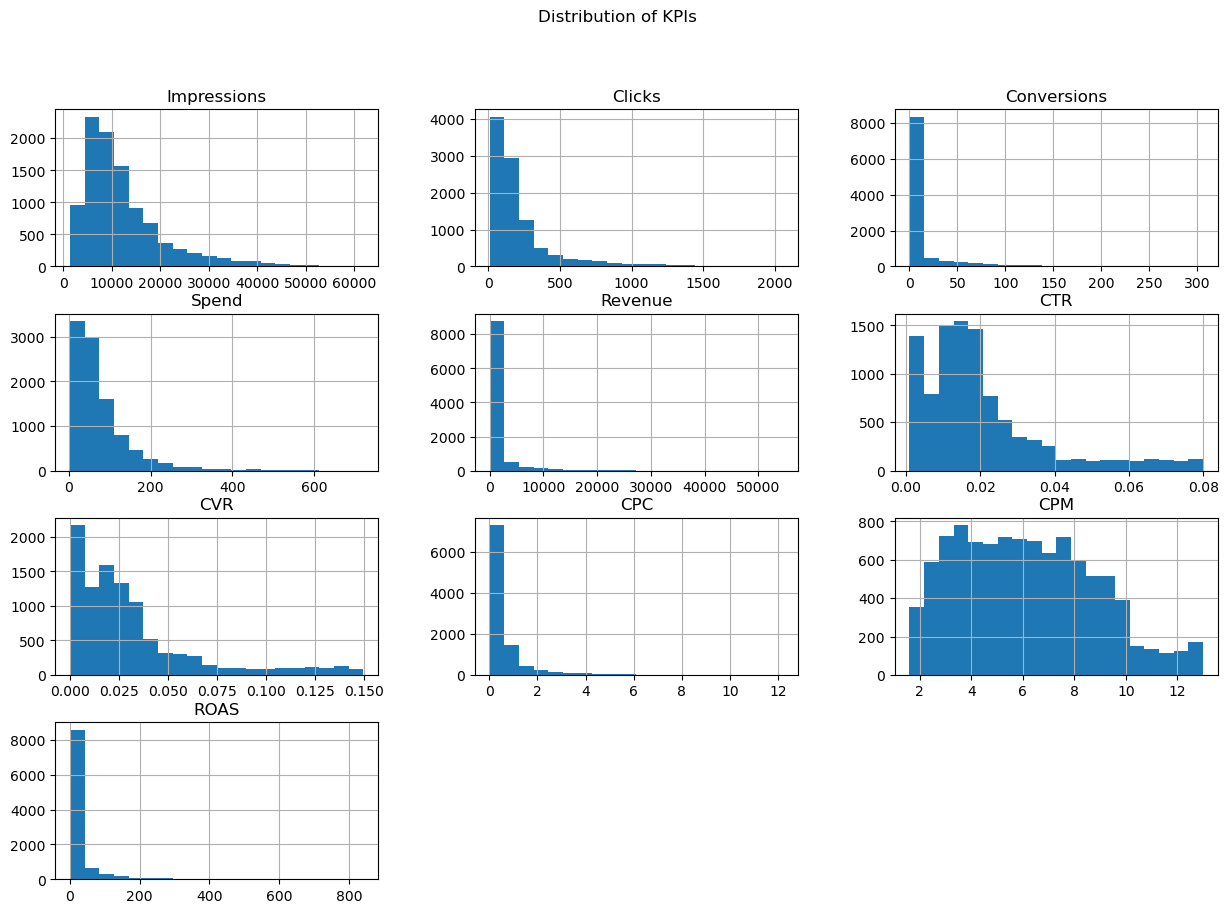

In [81]:
# Histograms
import matplotlib.pyplot as plt
df[num_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribution of KPIs')
plt.show()

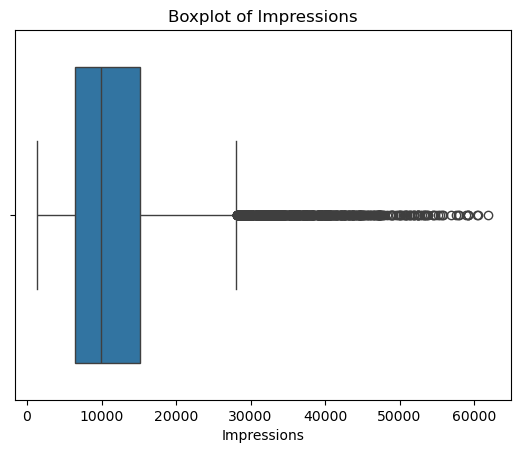

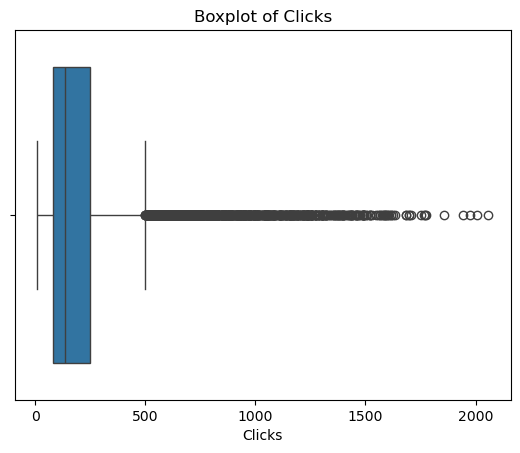

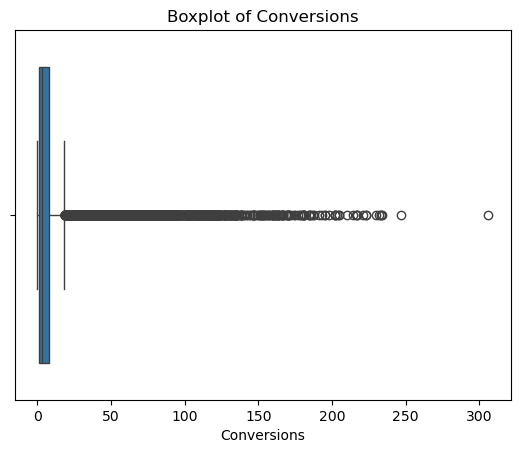

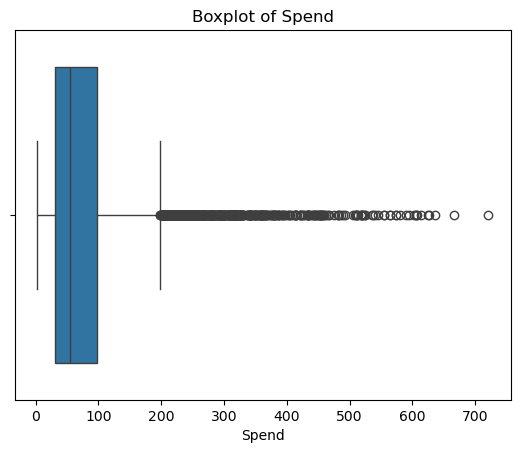

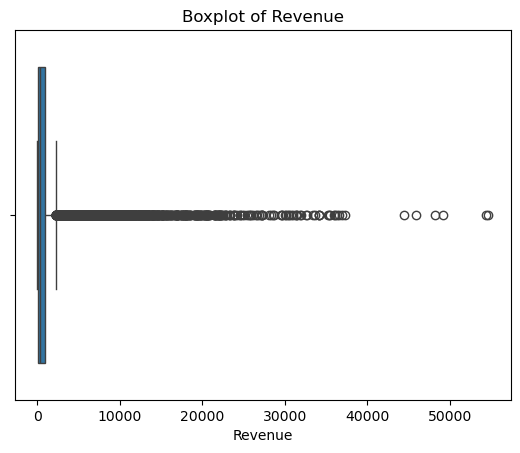

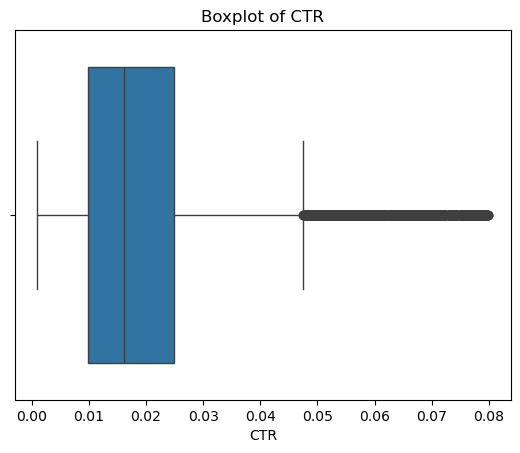

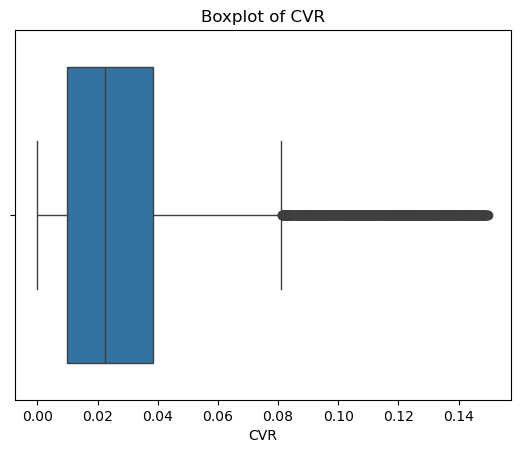

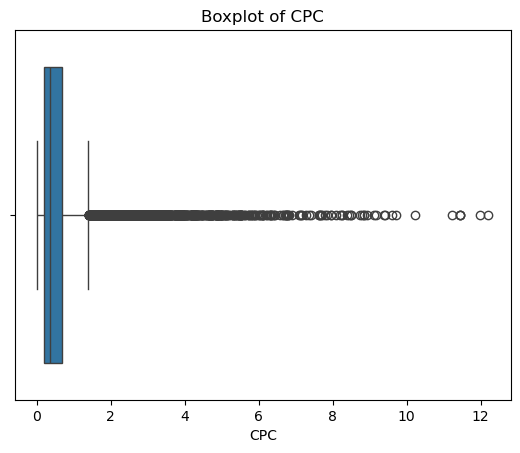

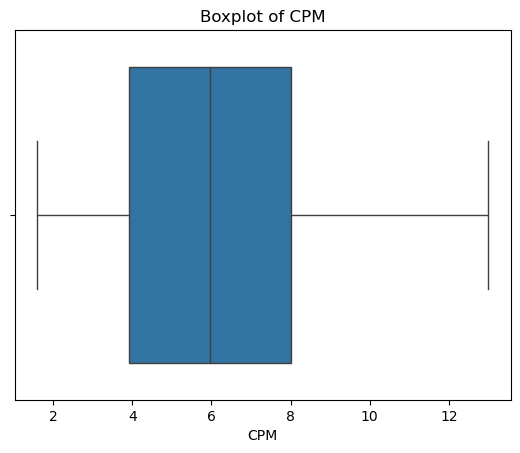

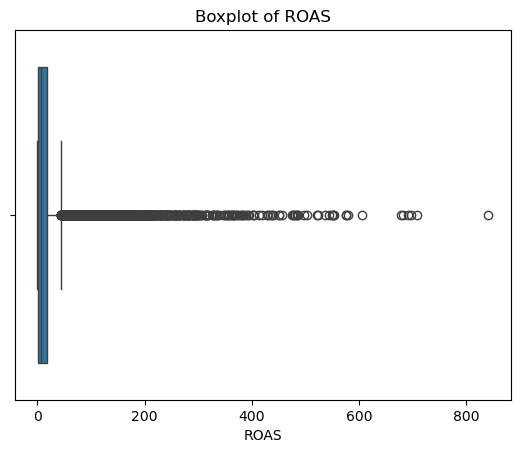

In [82]:
# Boxplots for KPIs
import seaborn as sns
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### Bivariant Analysis

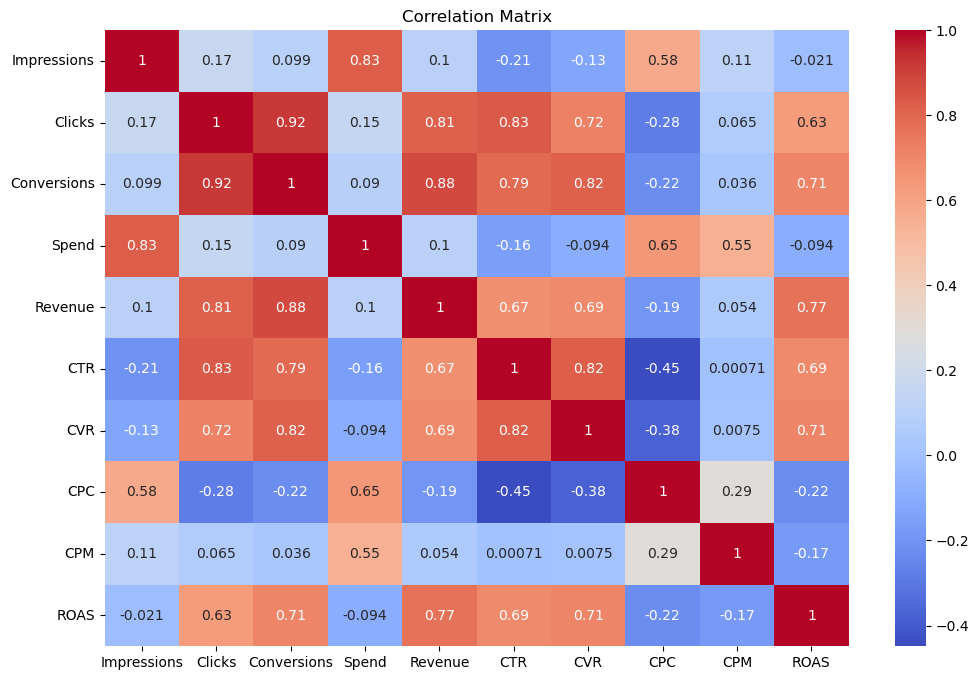

In [83]:
# Correlation matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [84]:
# Scatter plots for key relationships
import plotly.express as px
px.scatter(df, x='Date', y='ROAS')



In [85]:
px.scatter(df, x='Date', y='CTR')


In [86]:
px.scatter(df, x='Date', y='CVR')


In [87]:
px.scatter(df, x='Date', y='CPC')

In [88]:
px.scatter(df, x='Date', y='CPM')

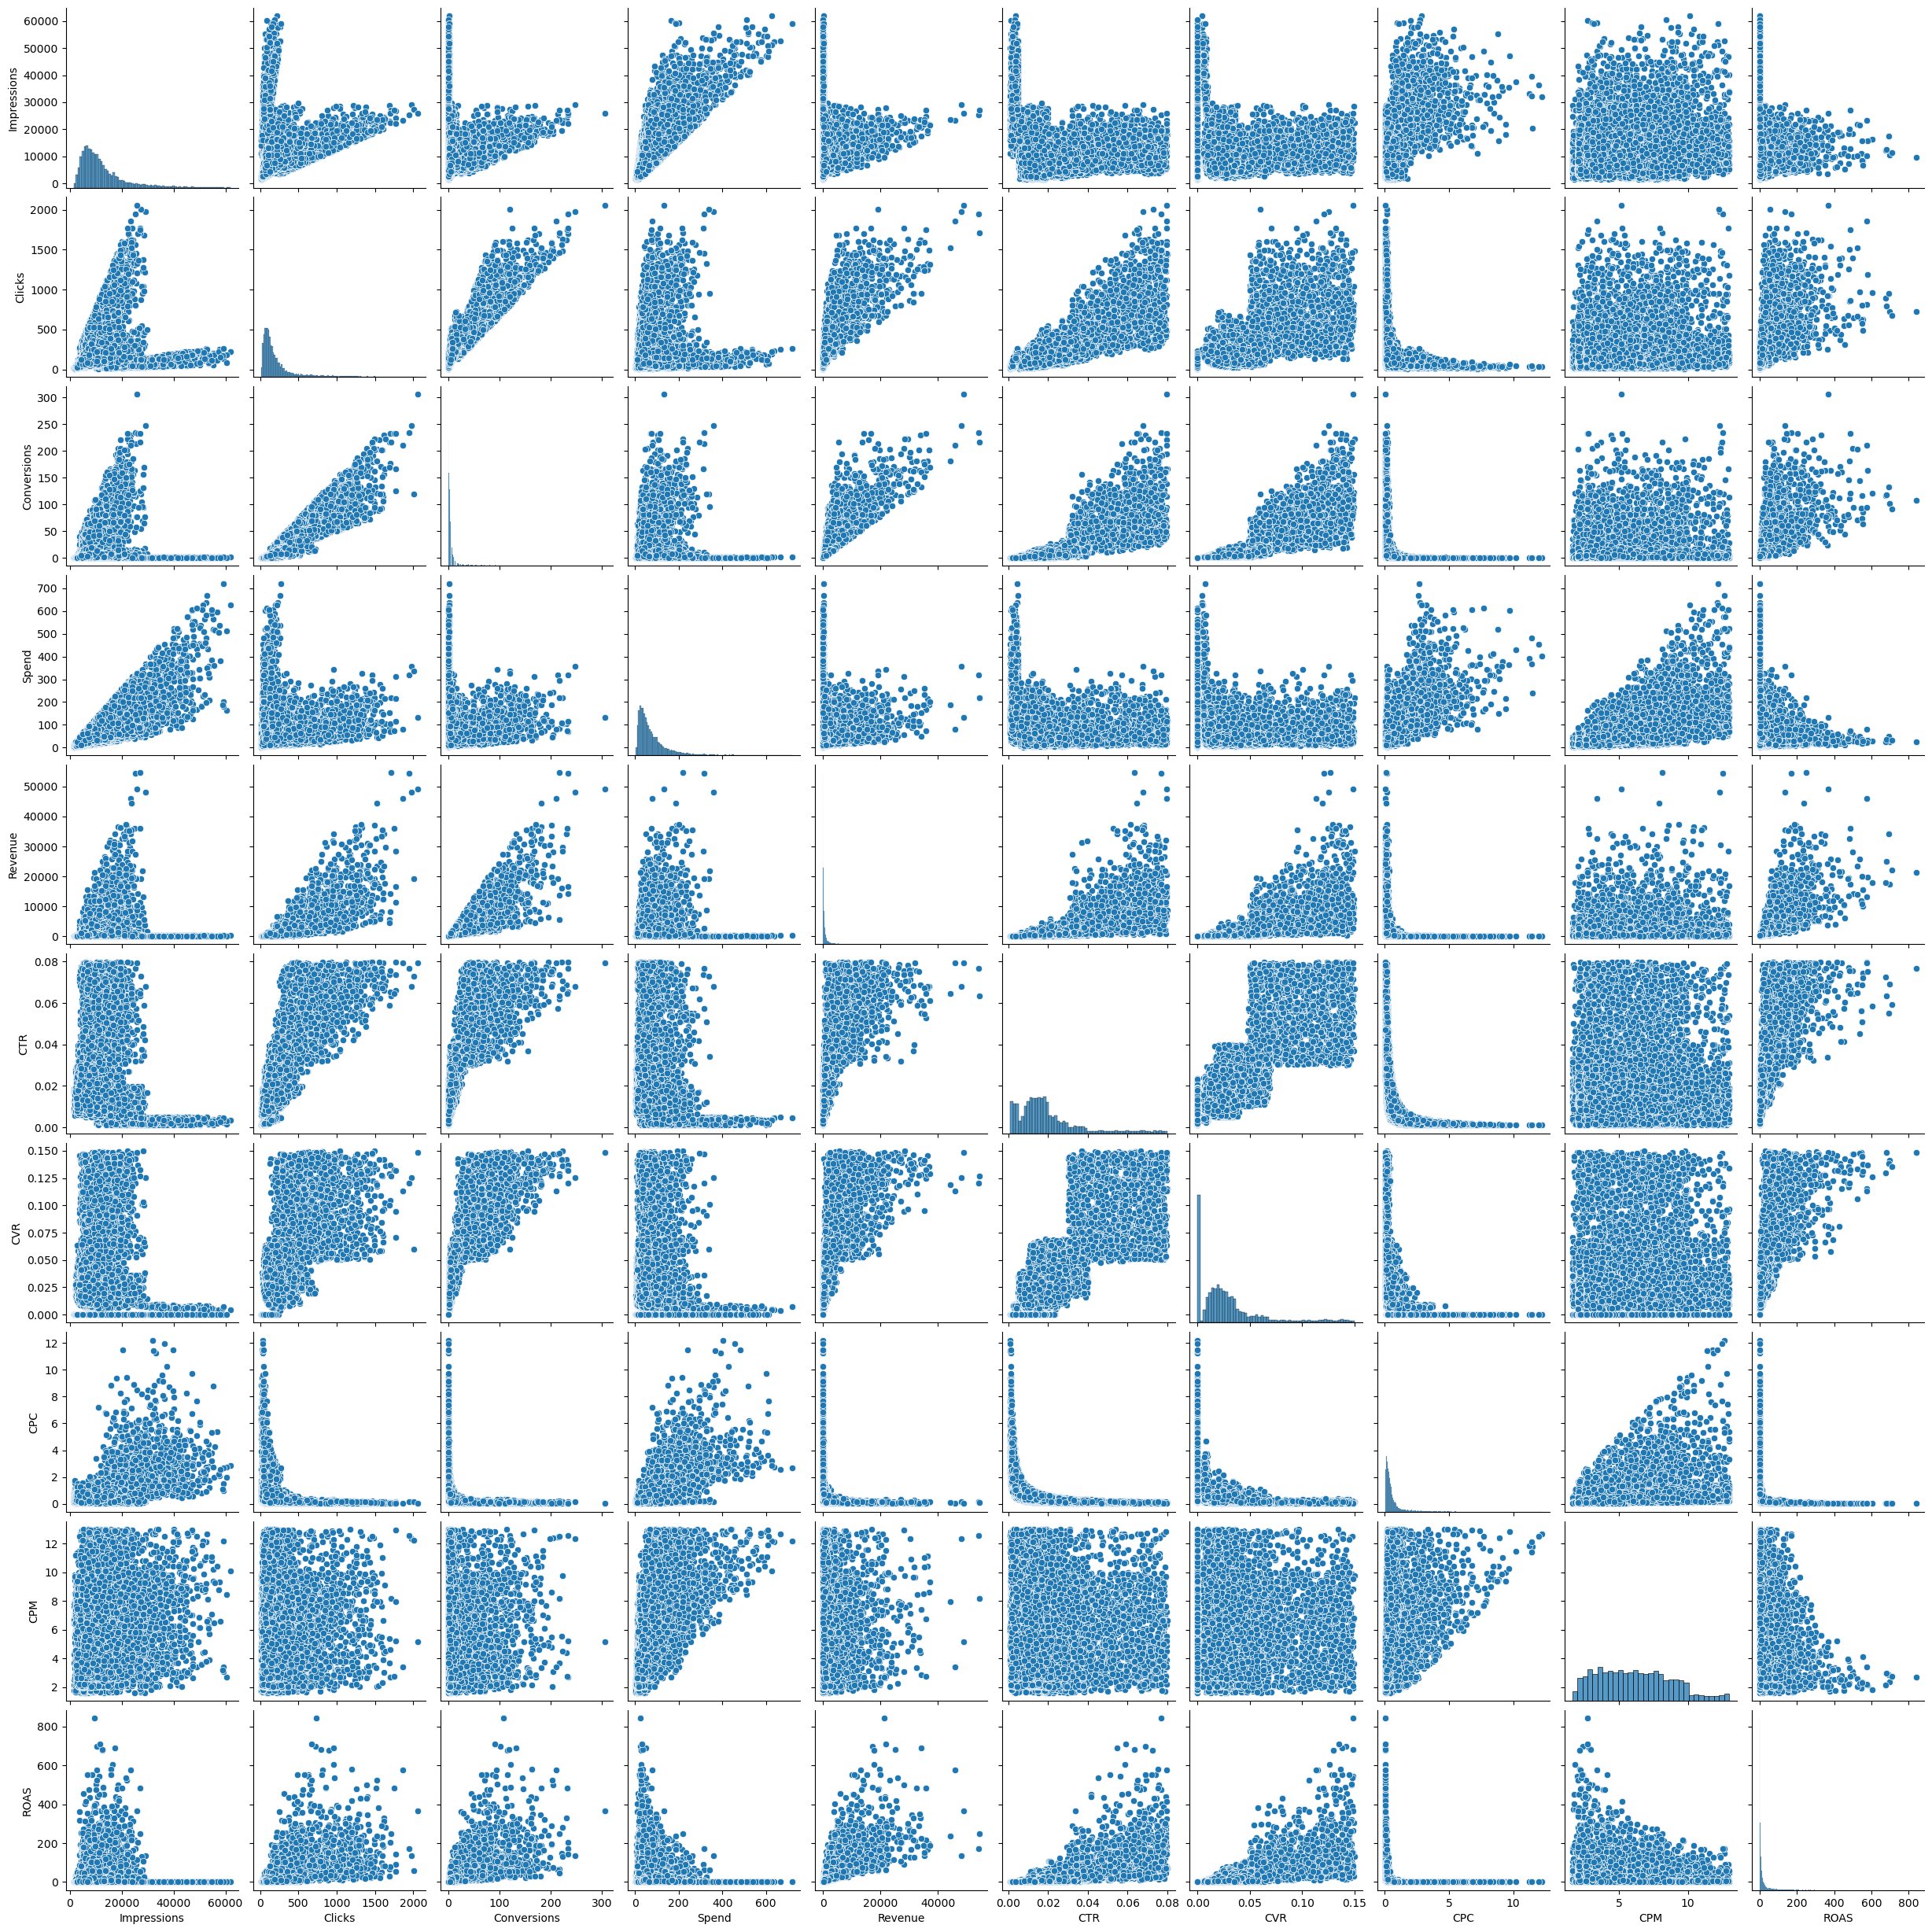

In [89]:
# Pairplot for quick relationships
sns.pairplot(df[num_cols])
plt.show()

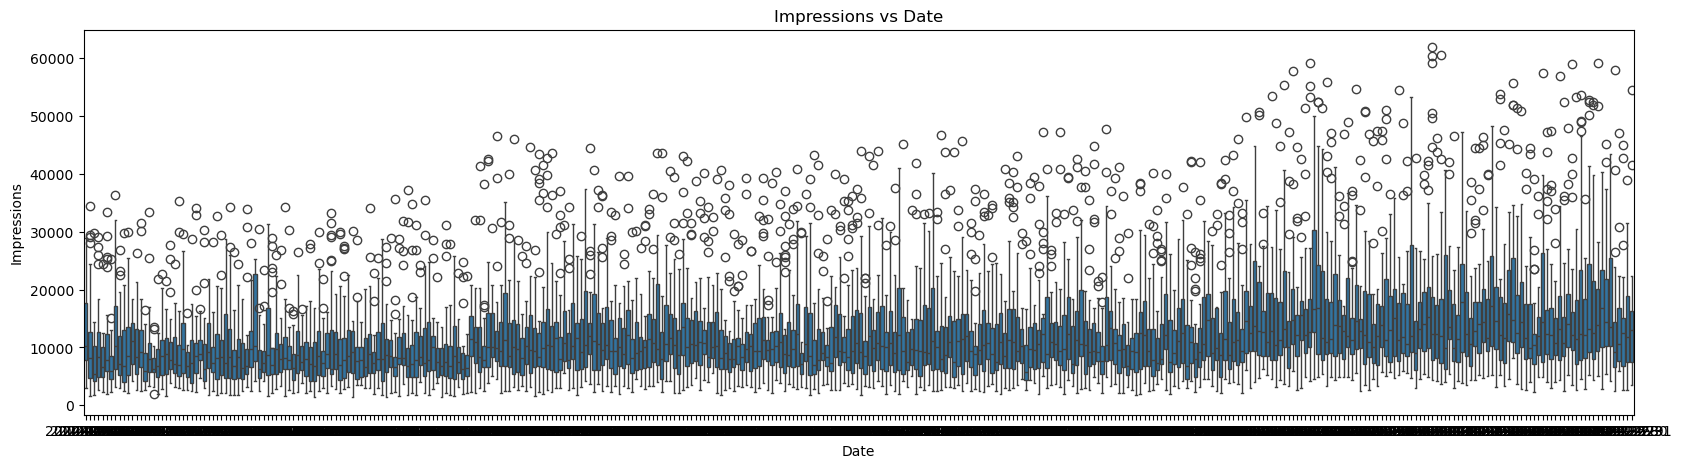

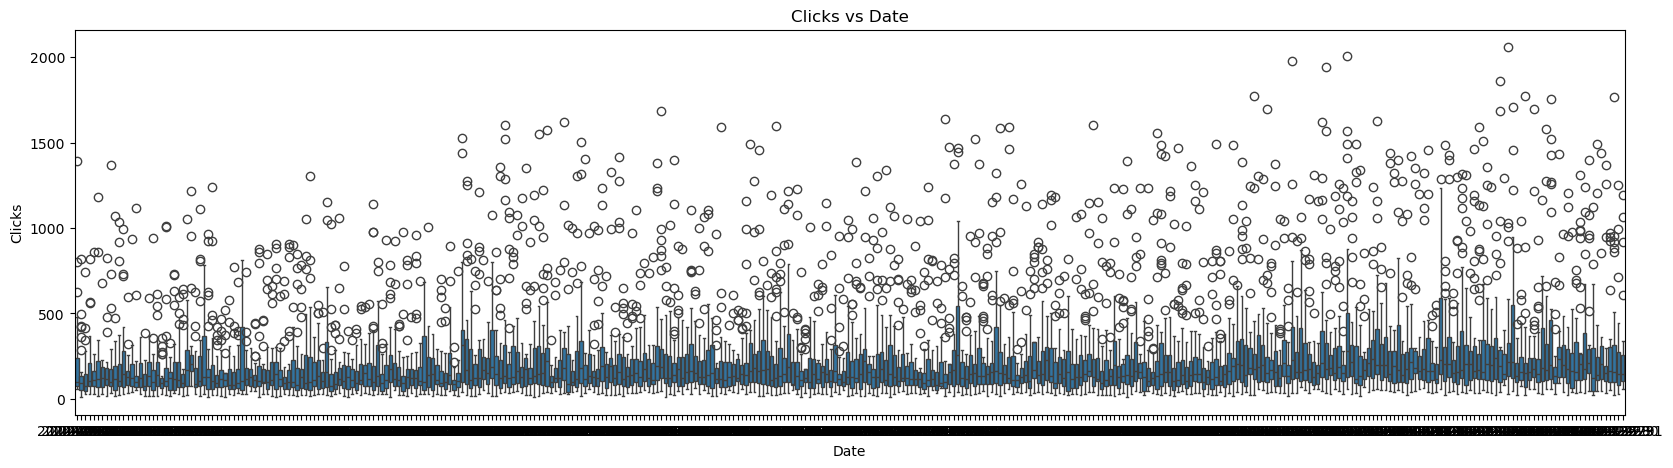

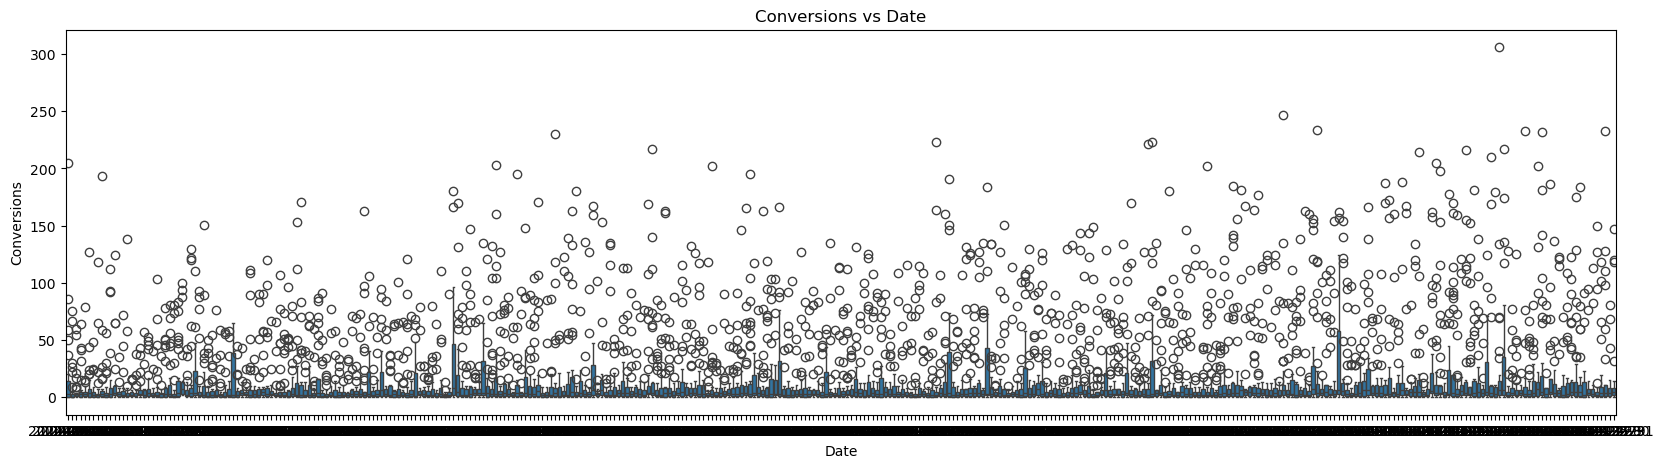

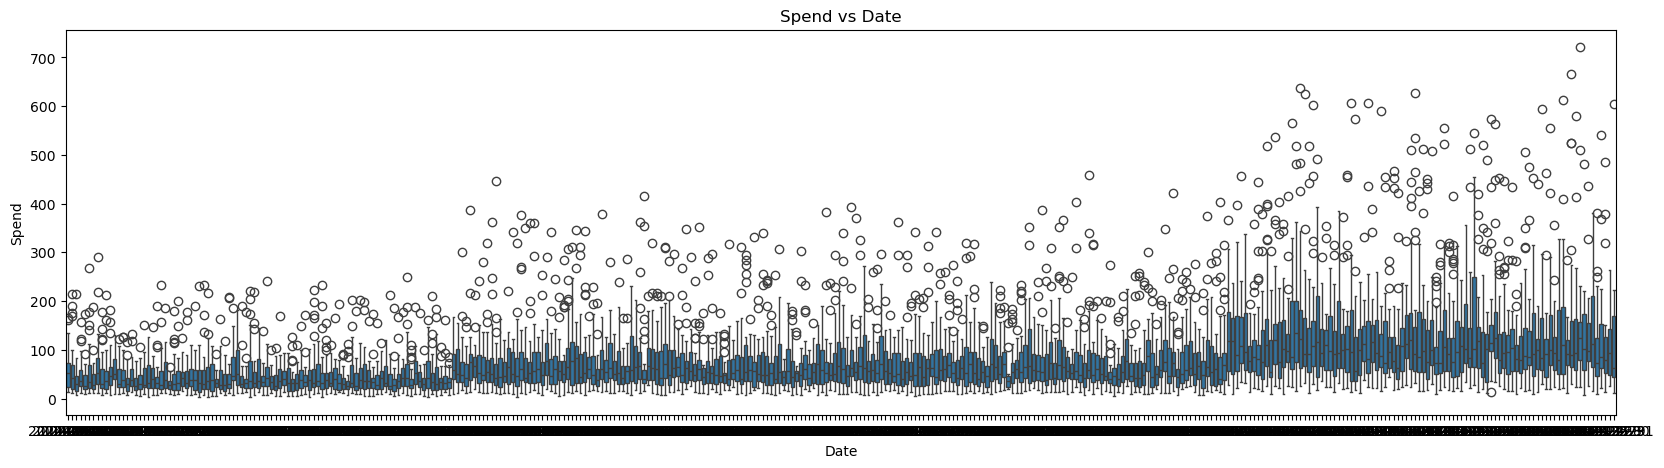

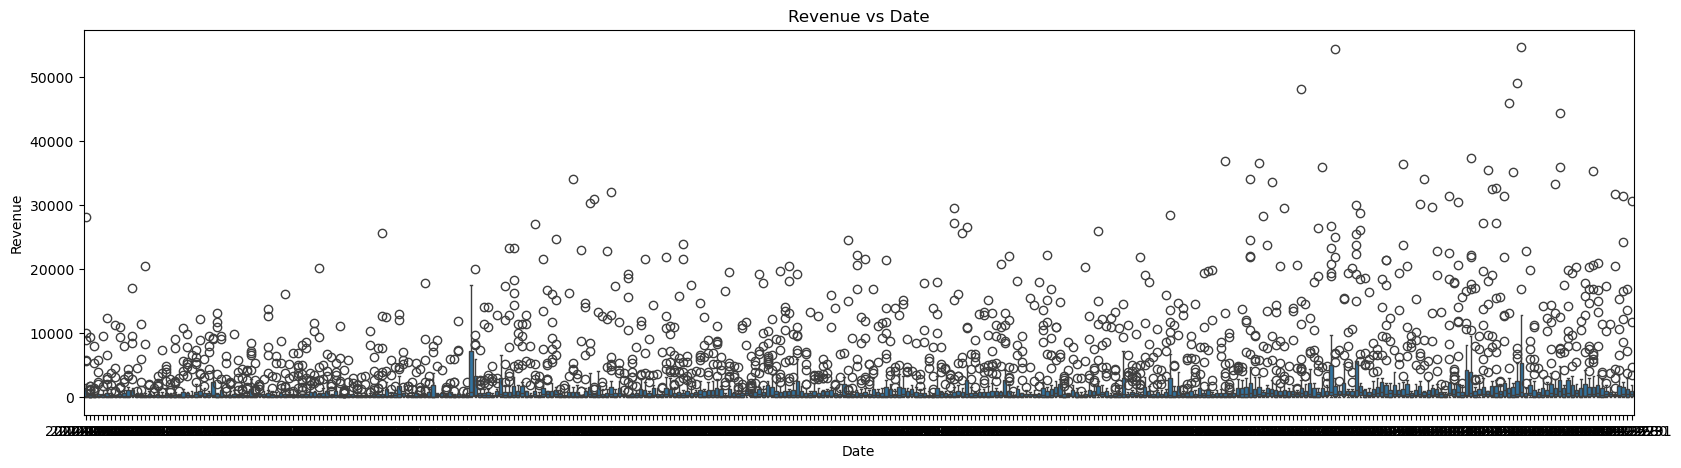

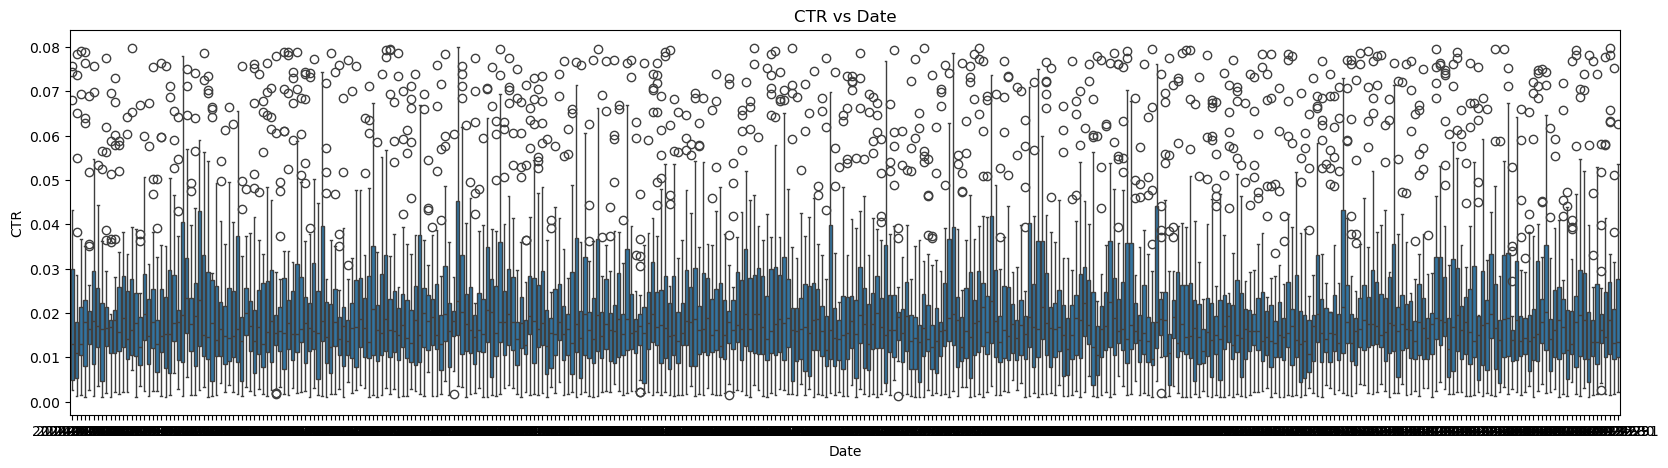

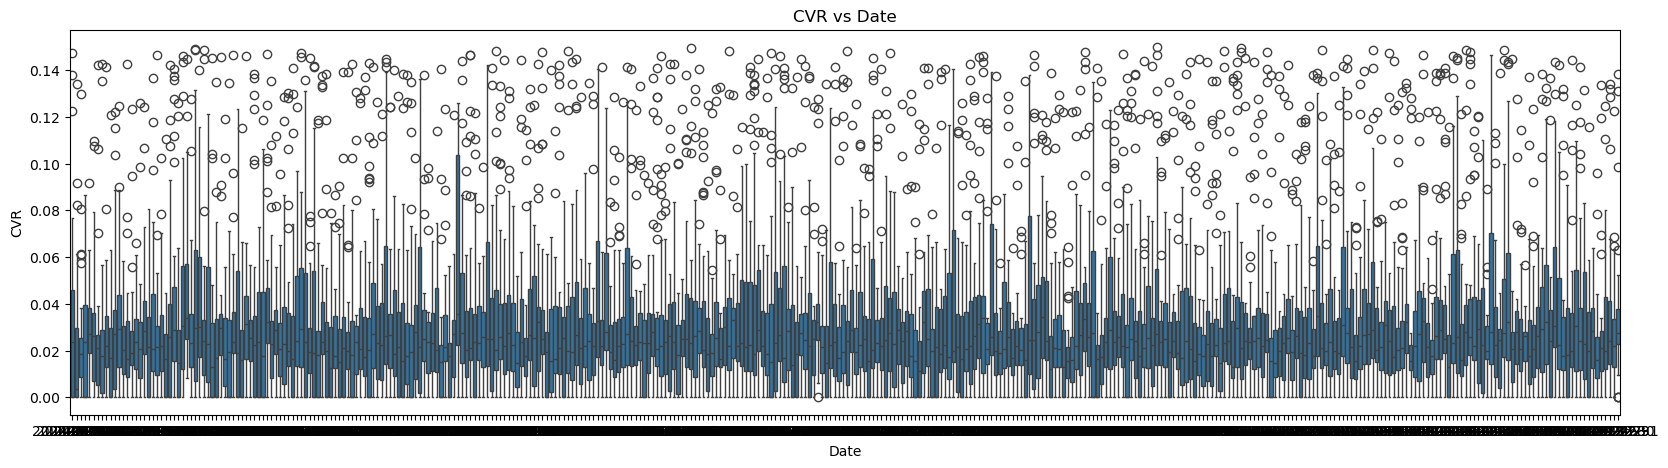

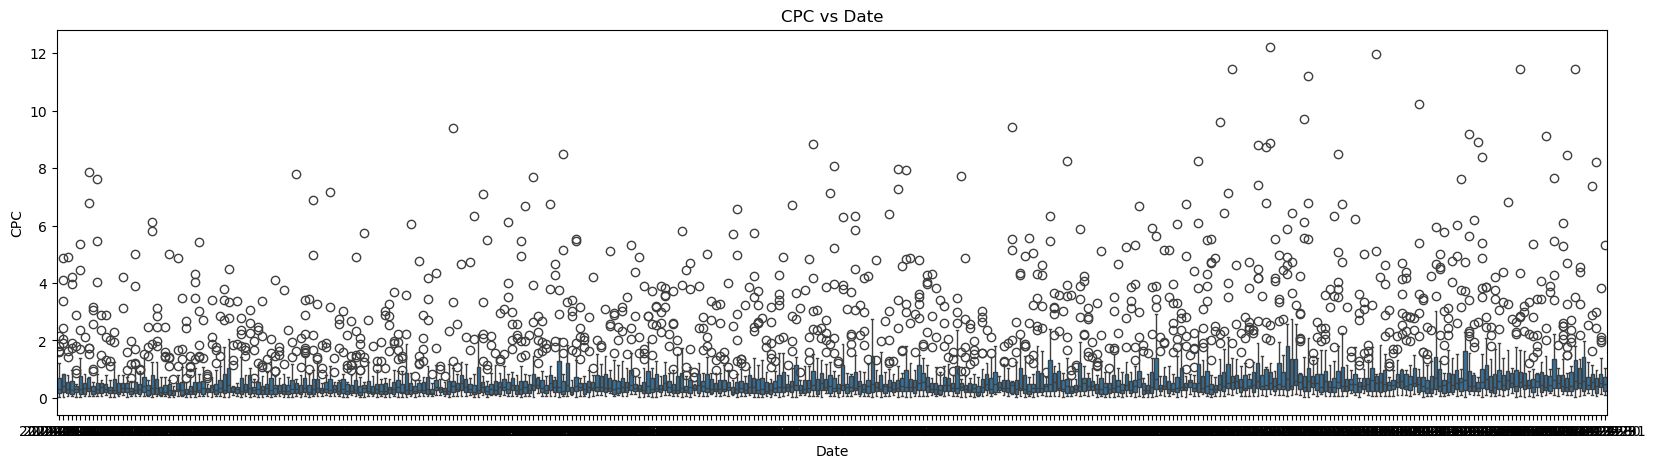

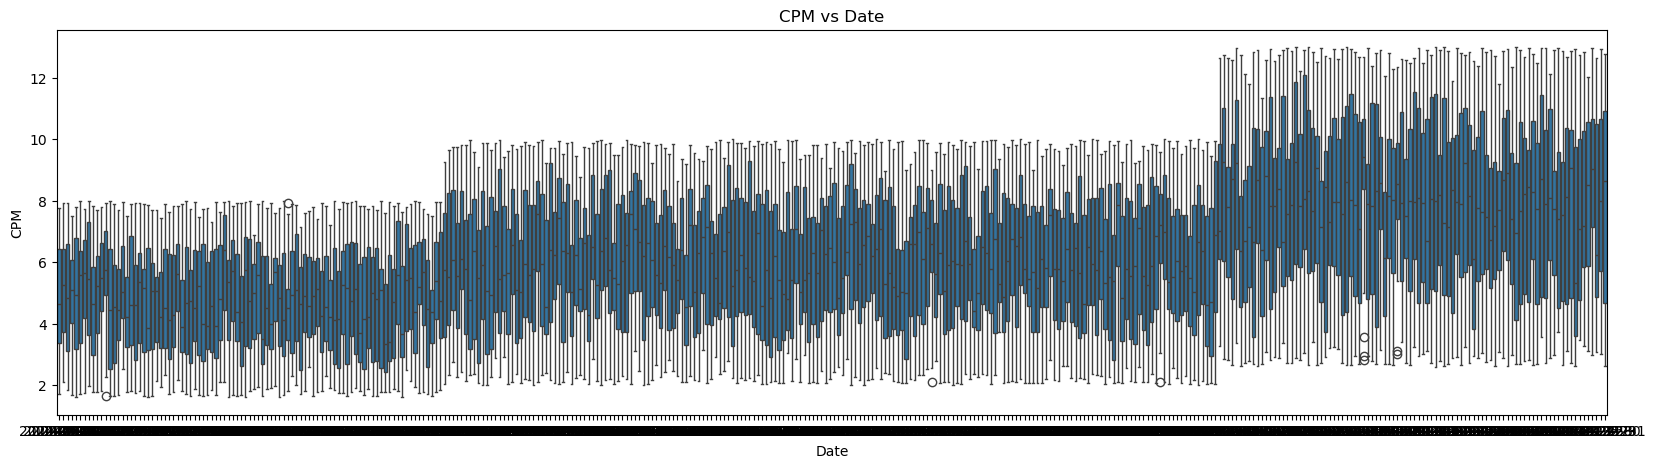

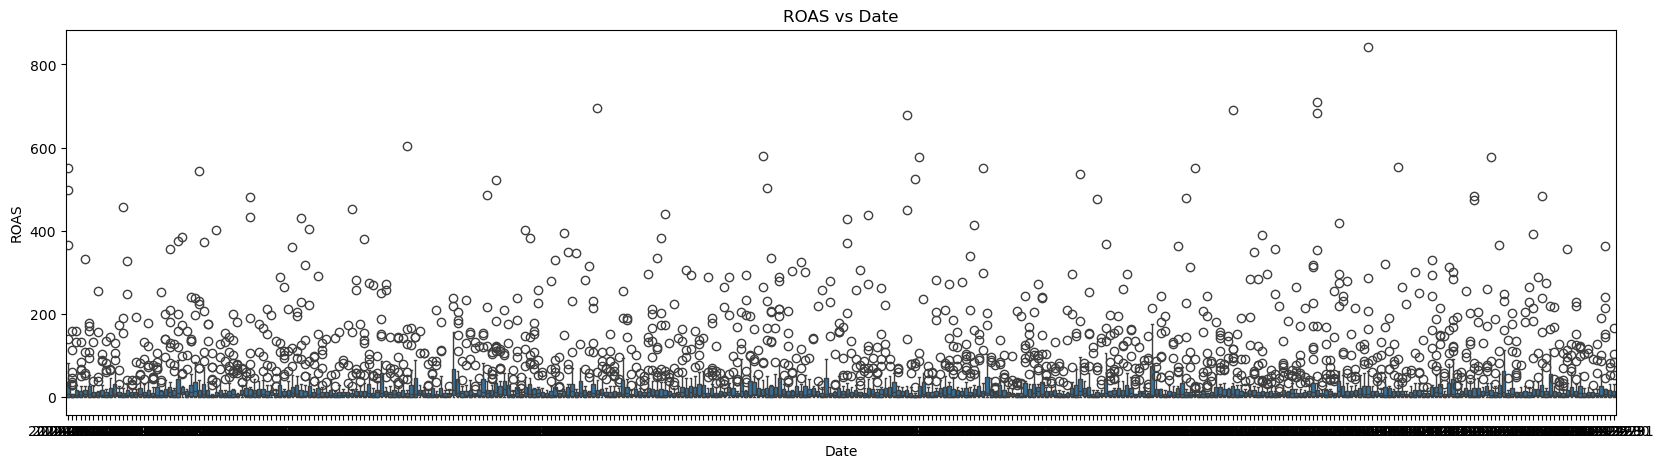

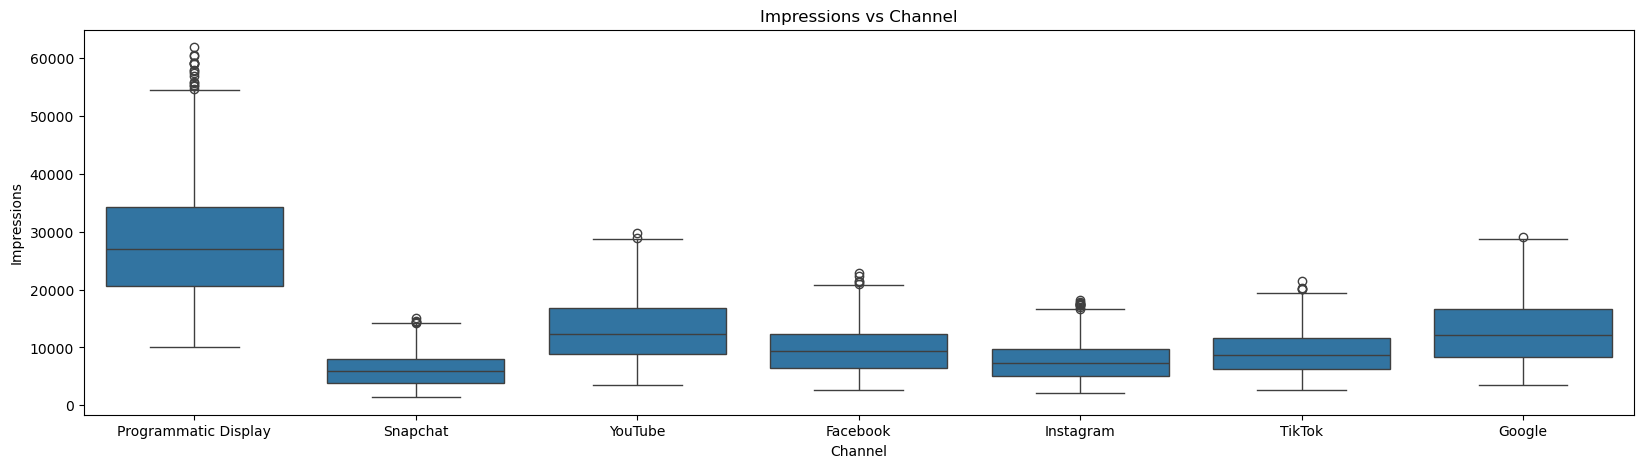

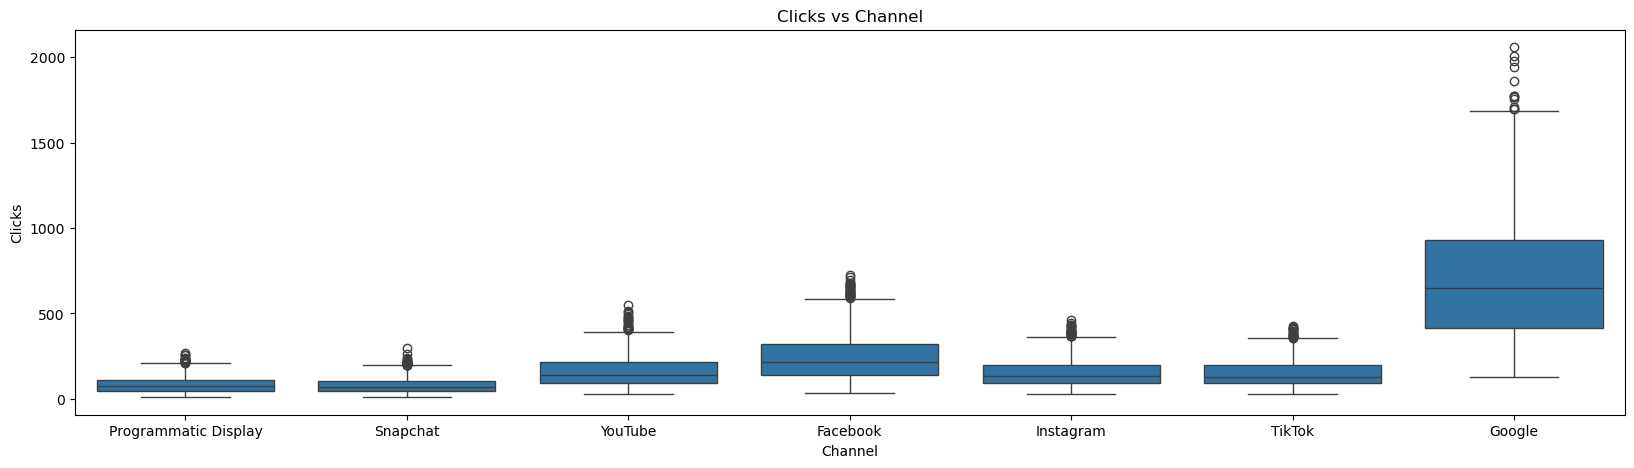

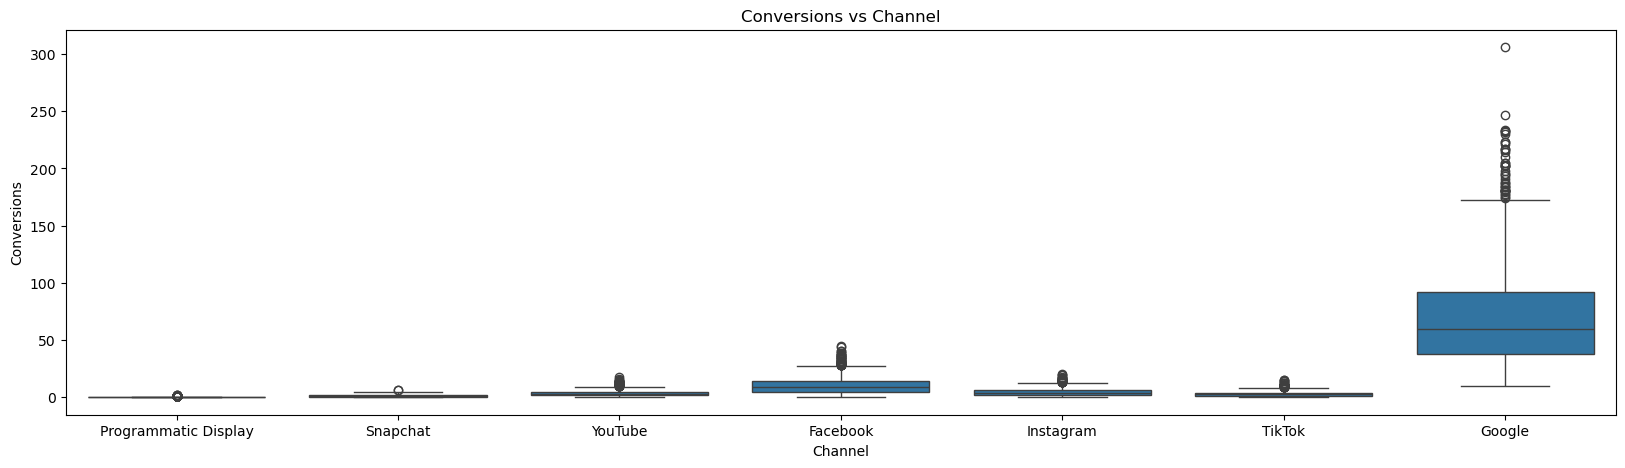

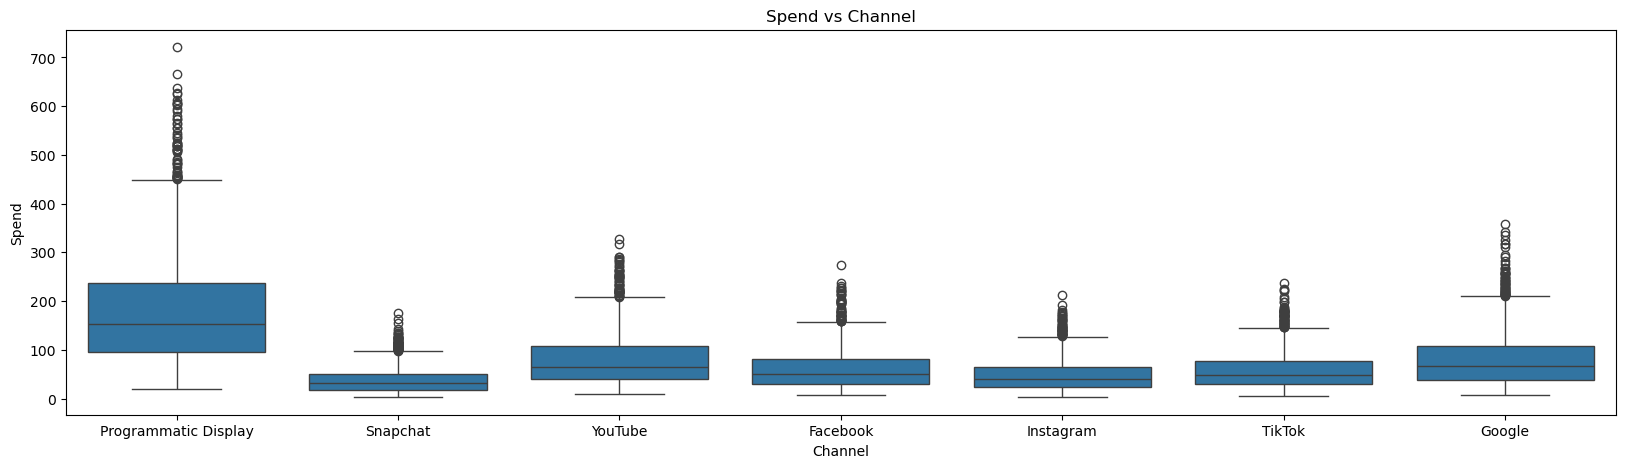

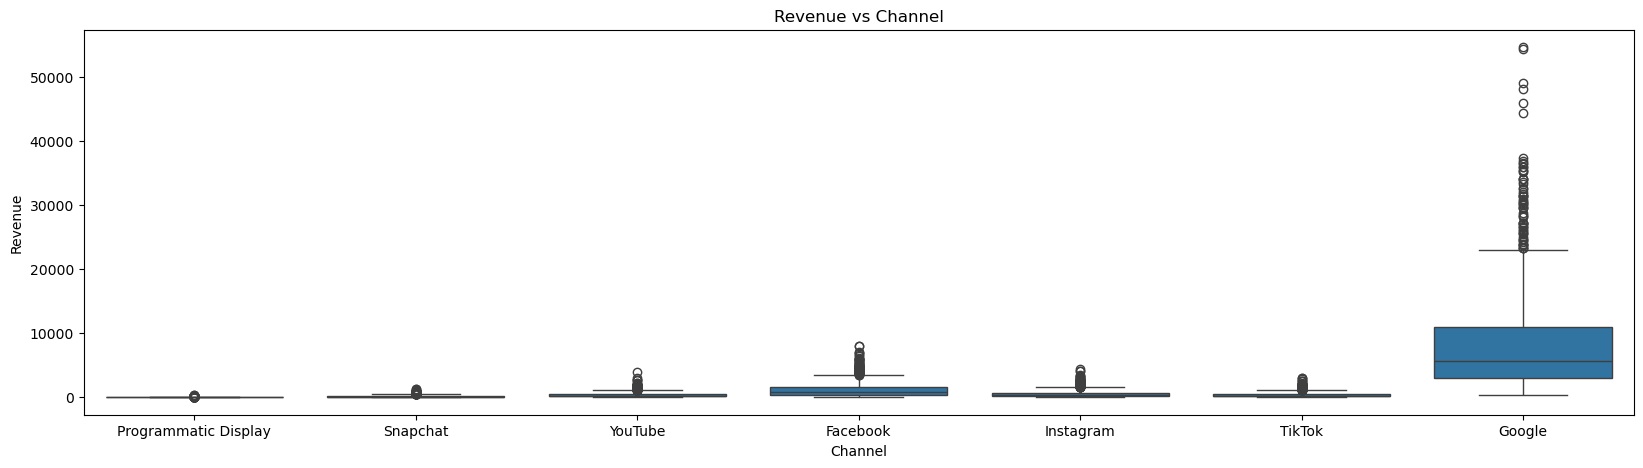

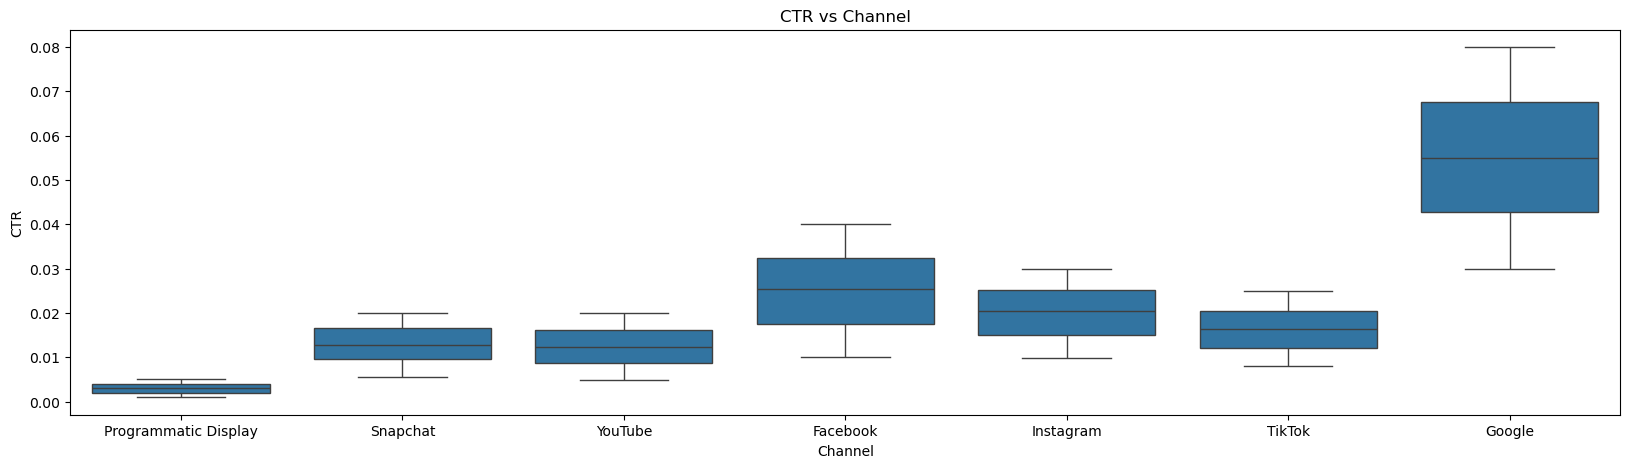

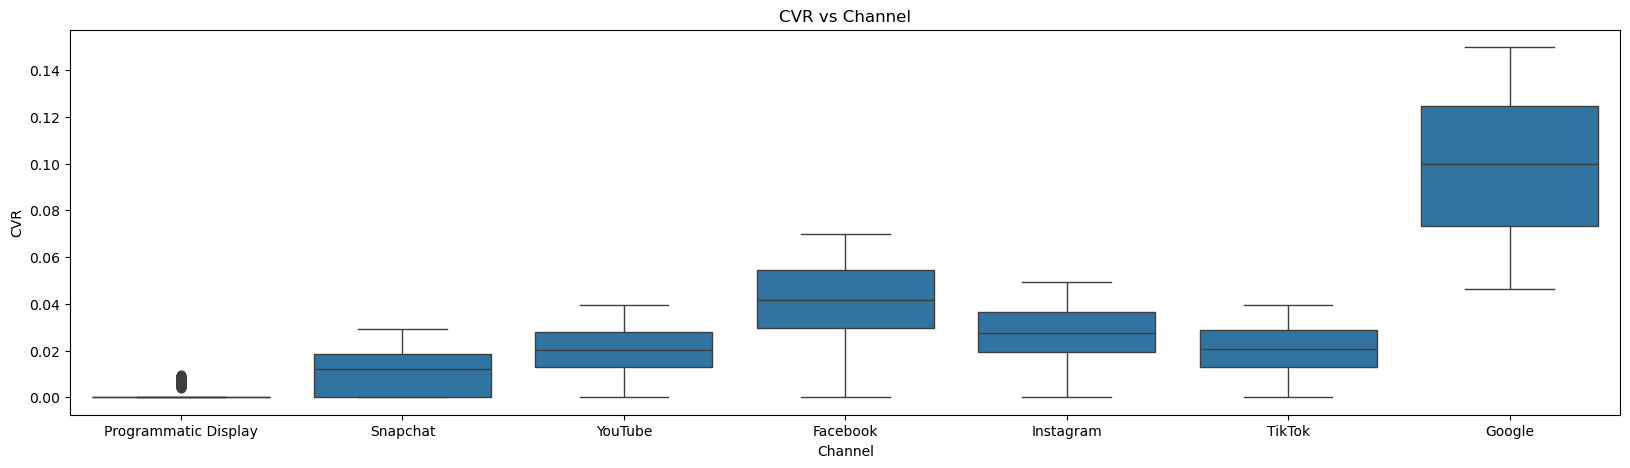

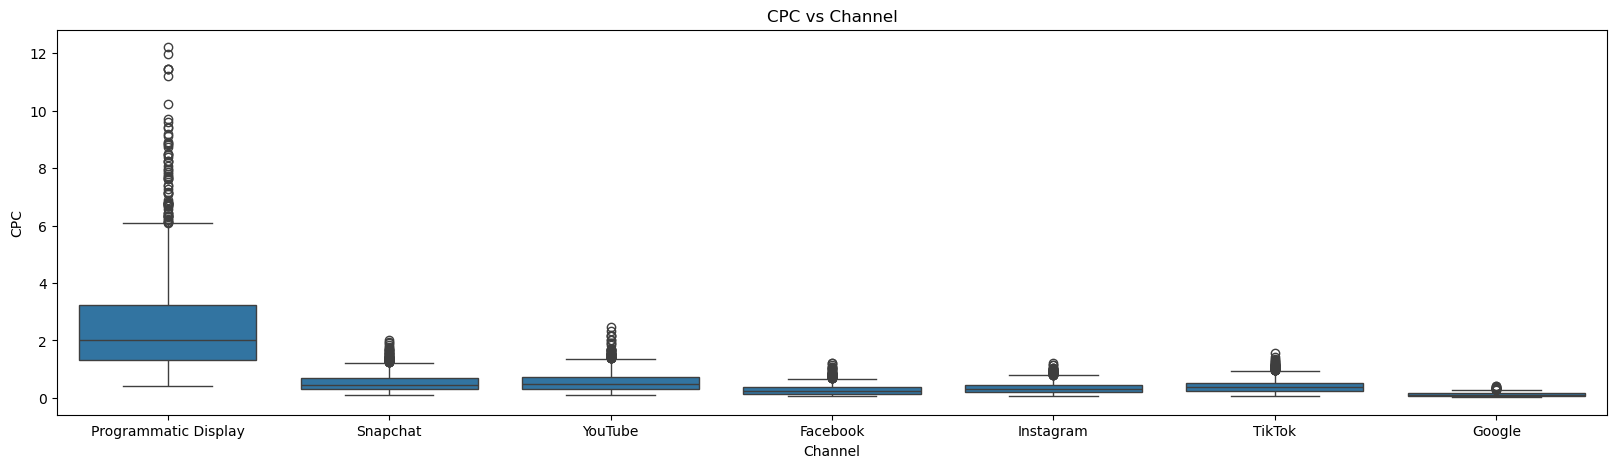

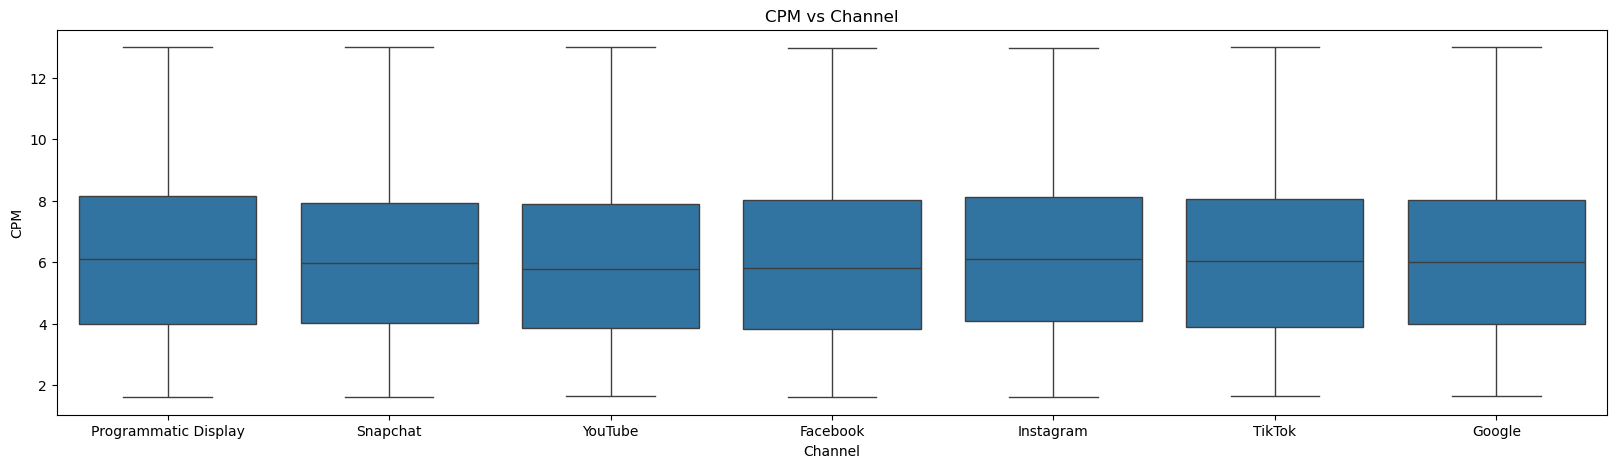

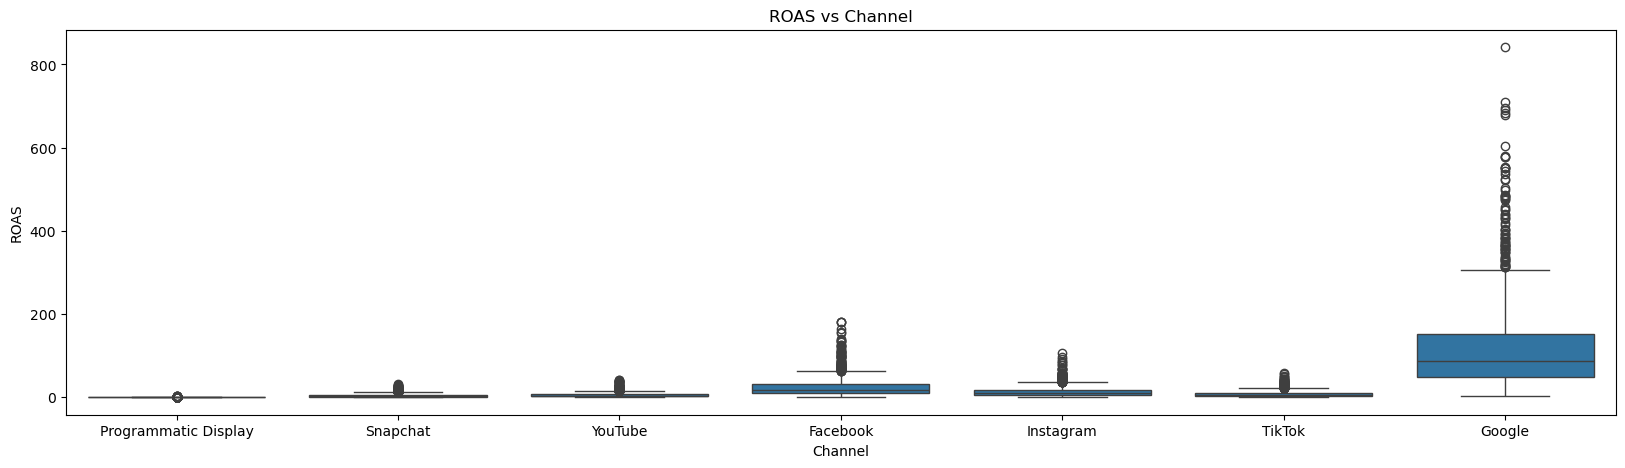

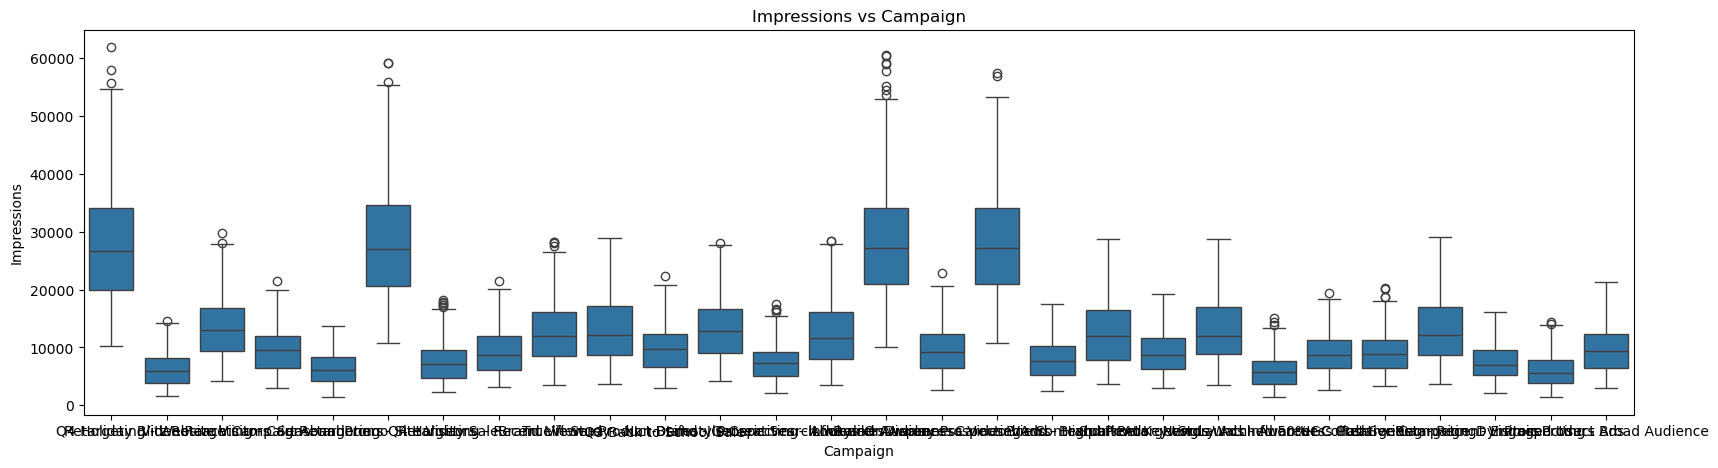

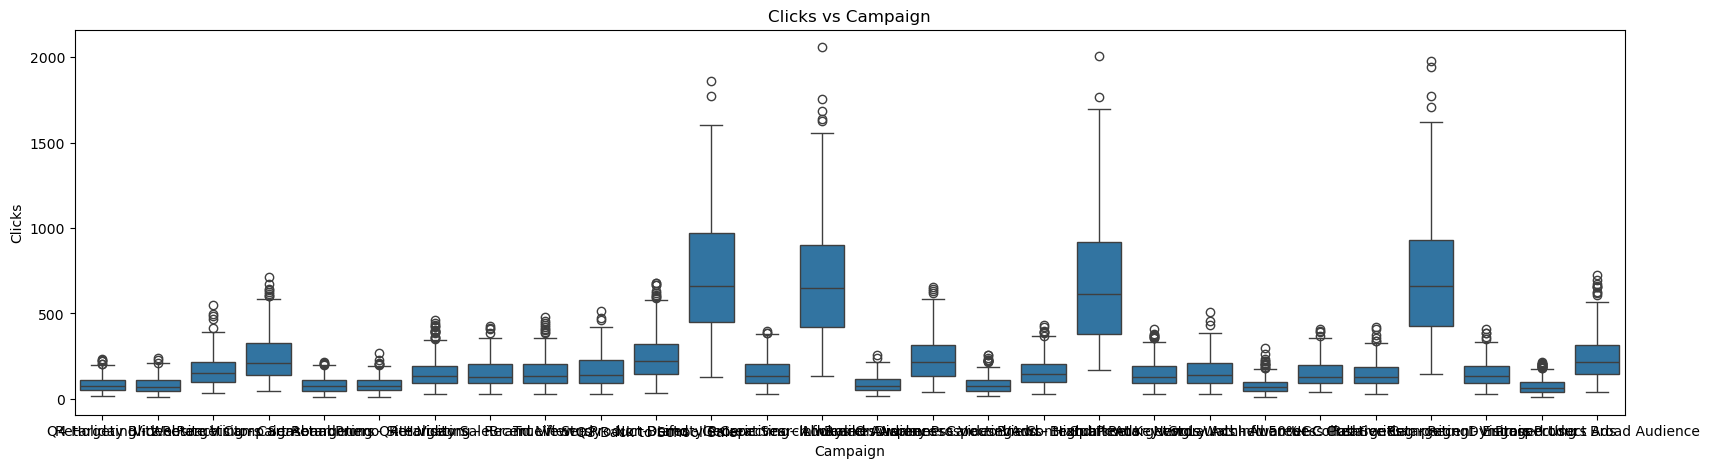

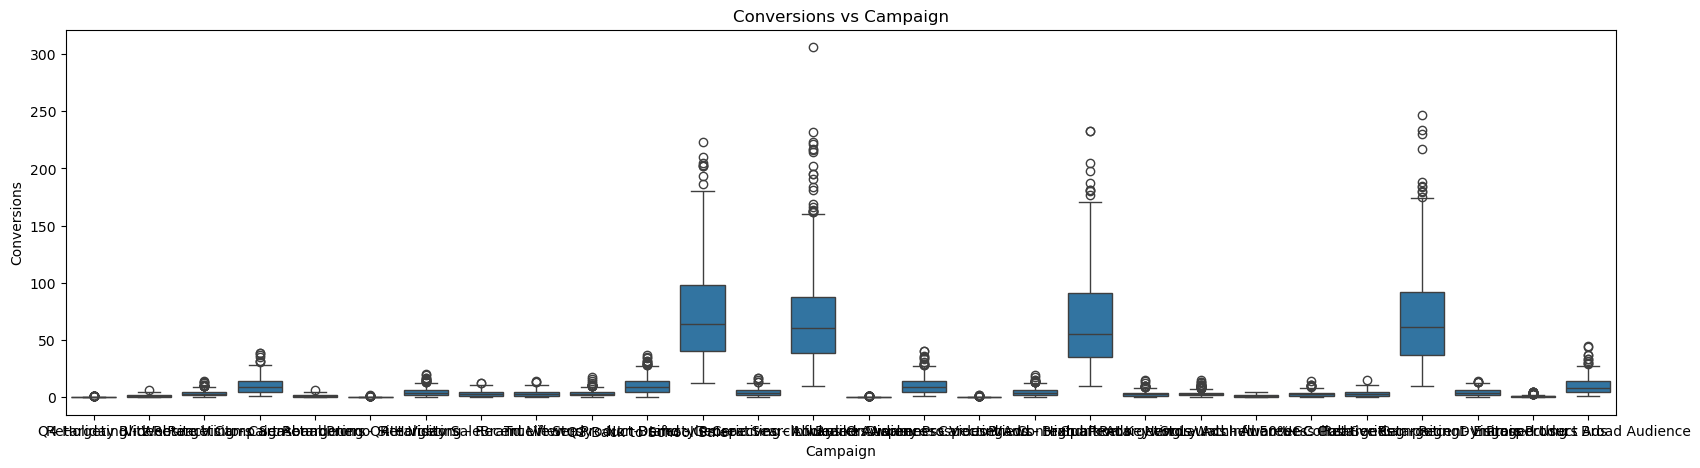

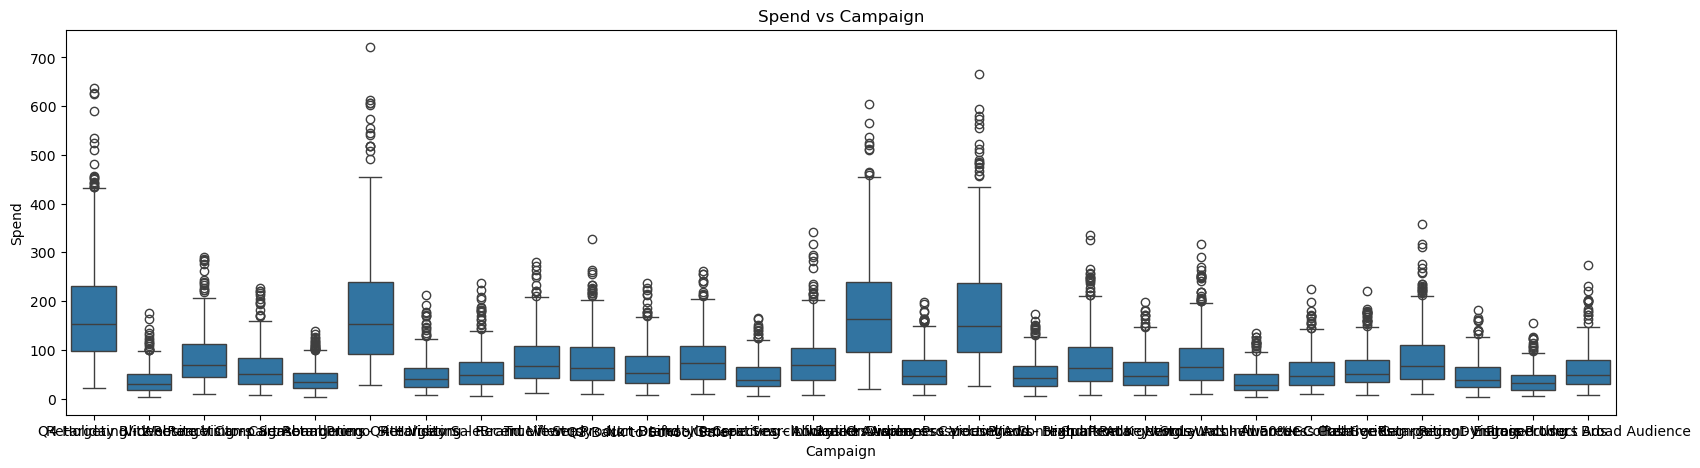

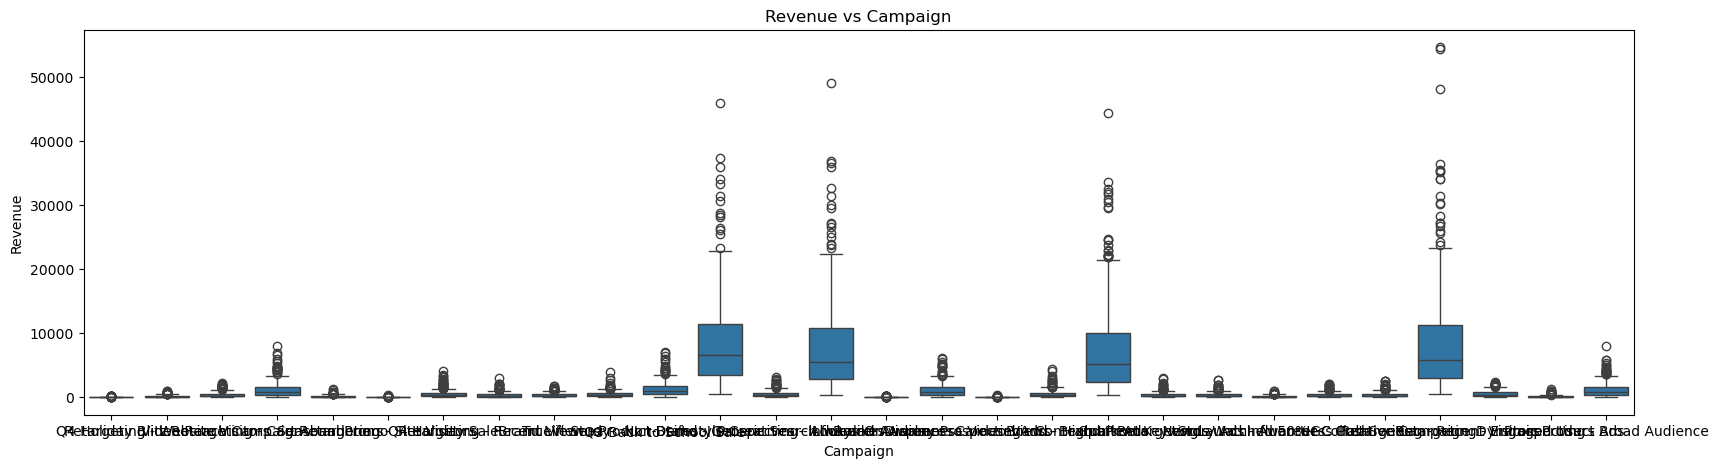

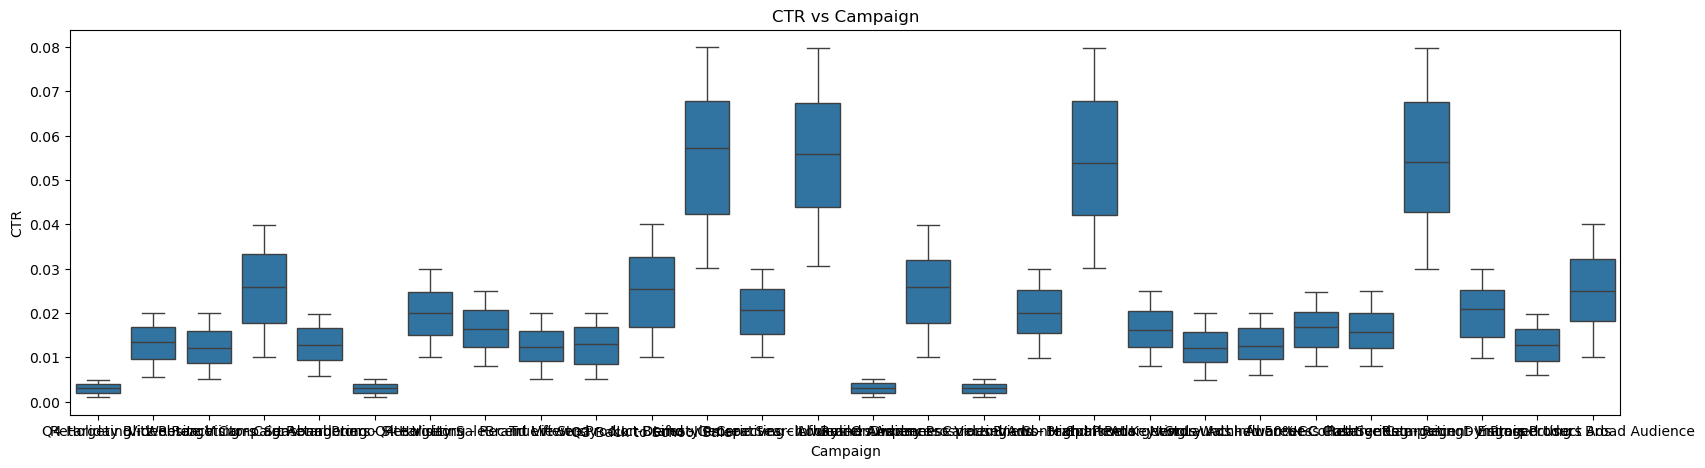

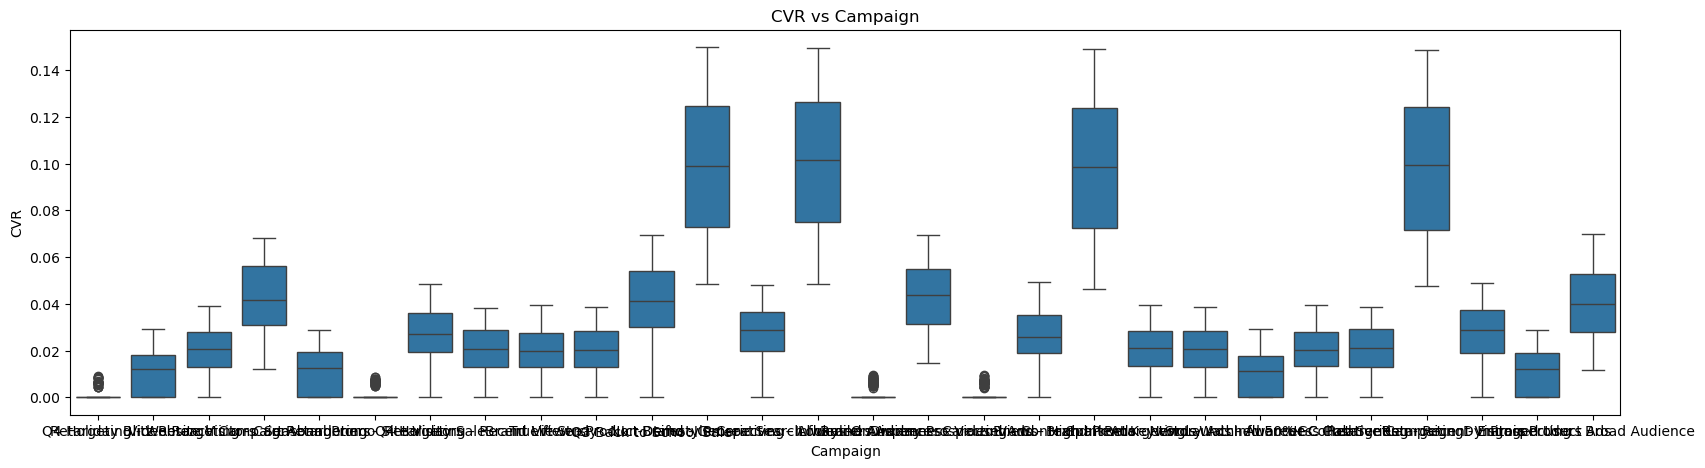

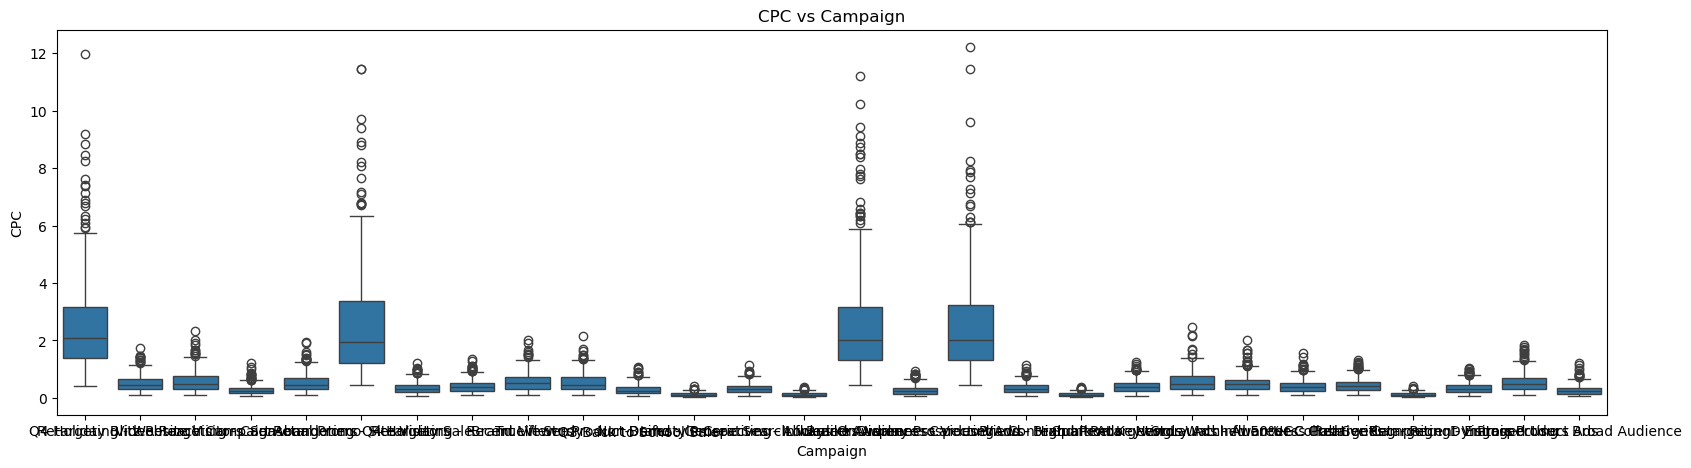

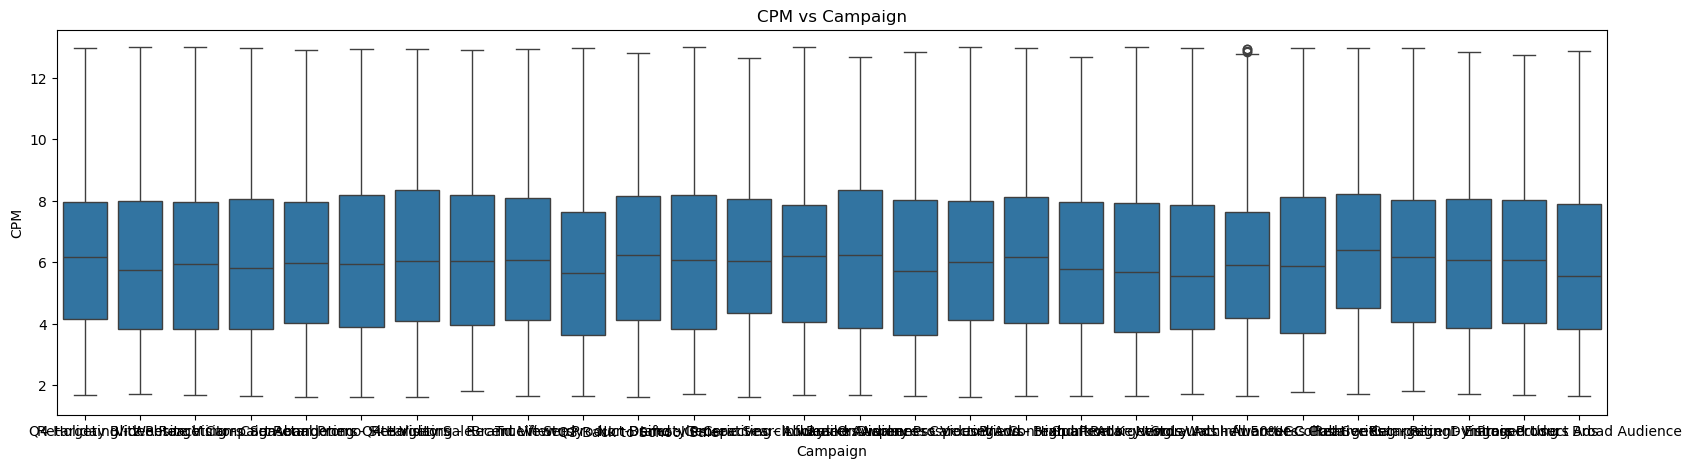

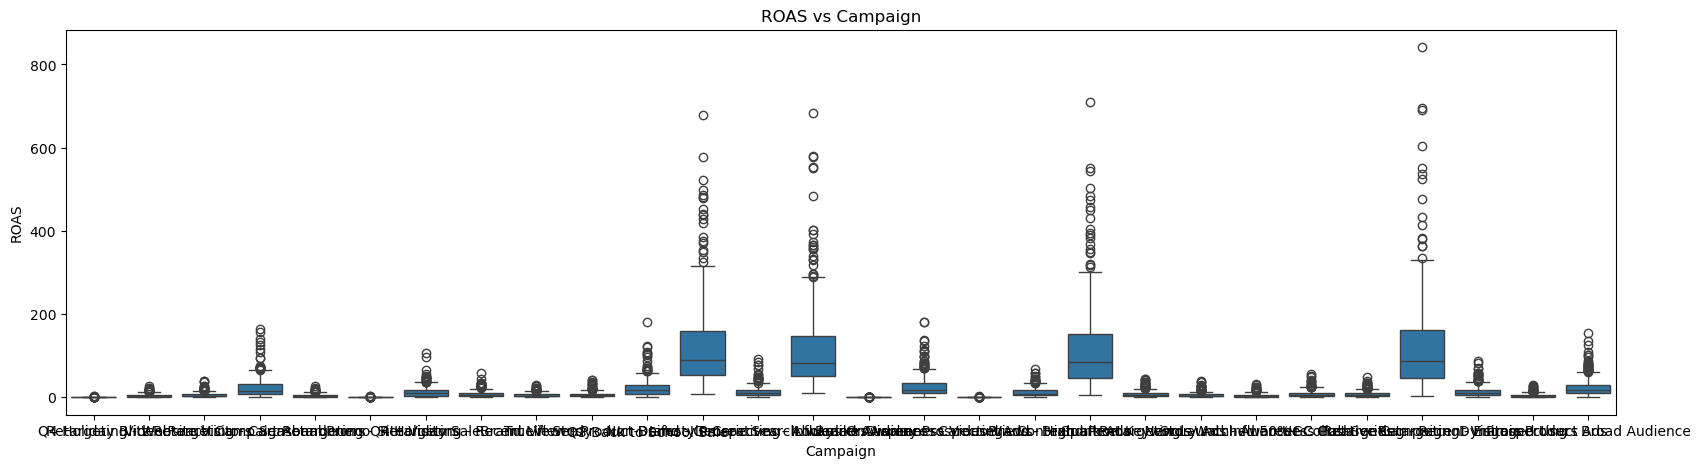

In [90]:
# Categorical vs Numeric
for cat in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(20, 5))
        sns.boxplot(x=cat, y=num, data=df)
        plt.title(f"{num} vs {cat}")
        plt.show()

### Featured Insights

In [91]:
# Detect skewness and kurtosis
df[num_cols].skew().sort_values(ascending=False)
df[num_cols].kurt().sort_values(ascending=False)

# Grouped statistics
# Example: Mean of numeric variables by category
df.groupby('Channel')[num_cols].mean().T

Channel         Facebook        Google    Instagram  Programmatic Display  \
Impressions  9740.818825  12741.065562  7627.527663          28306.028329   
Clicks        245.004246    705.054755   153.928769             84.943343   
Conversions    10.440198     70.394092     4.439834              0.106941   
Spend          61.600977     81.382572    49.188285            182.755156   
Revenue      1220.312795   8103.686463   539.362974             13.355042   
CTR             0.025069      0.055064     0.020188              0.003004   
CVR             0.041767      0.099257     0.027800              0.000691   
CPC             0.280799      0.120979     0.341312              2.525529   
CPM             6.112199      6.182104     6.251577              6.226670   
ROAS           24.220626    119.324844    12.943789              0.059401   

Channel         Snapchat       TikTok       YouTube  
Impressions  6118.953042  9155.418571  13014.144157  
Clicks         79.136243   148.701429    161.109167  
Conversions     1.074074     3.237857      3.421274  
Spend          38.183340    58.408314     80.938041  
Revenue       129.329623   381.646536    386.521008  
CTR             0.012962     0.016232      0.012409  
CVR             0.010772     0.020723      0.020318  
CPC             0.527520     0.423239      0.560072  
CPM             6.098182     6.213500      6.046323  
ROAS            3.442604     7.638186      5.626304

### Outliers & Distribution

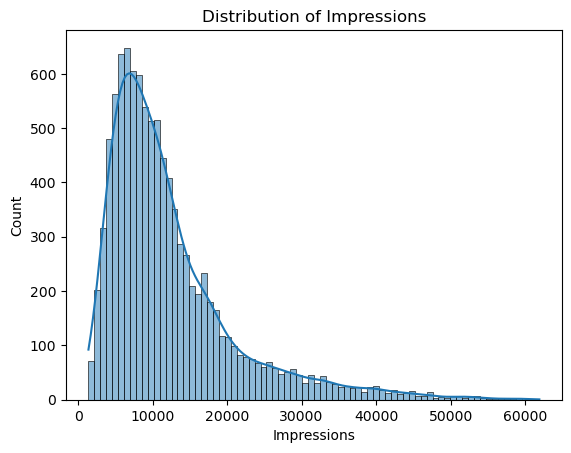

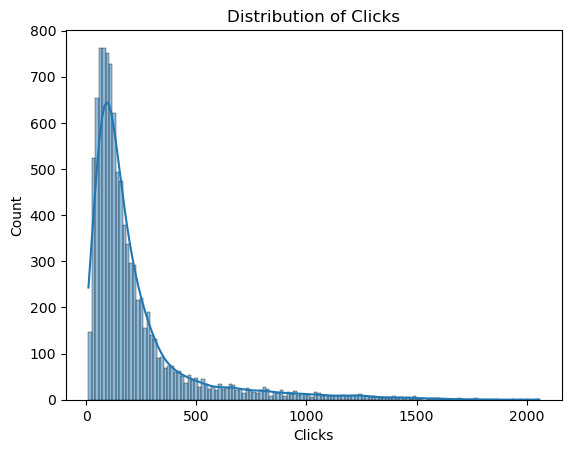

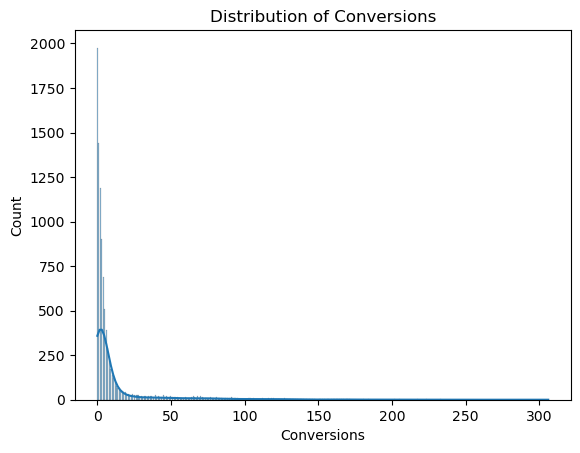

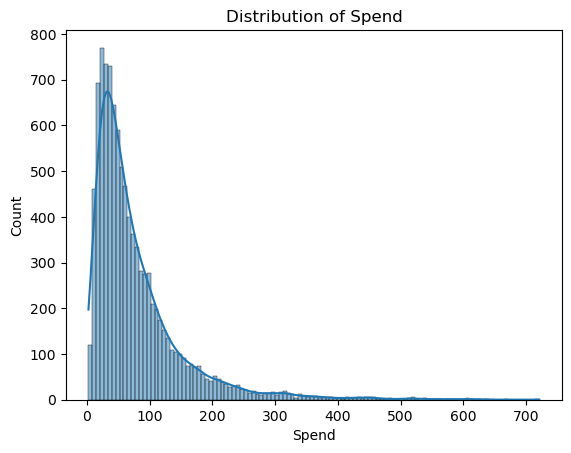

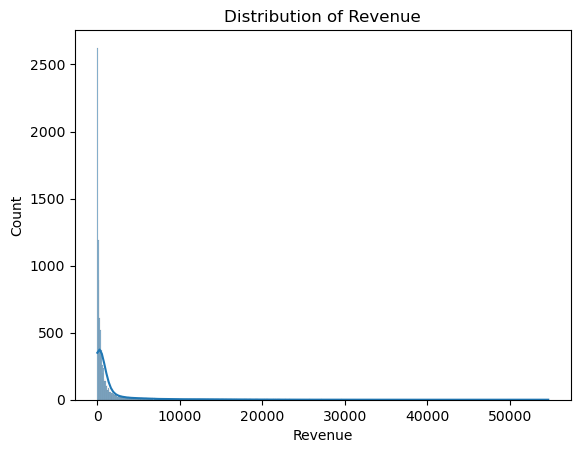

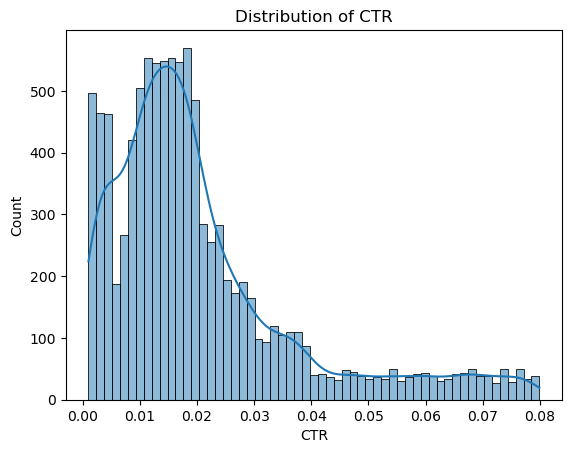

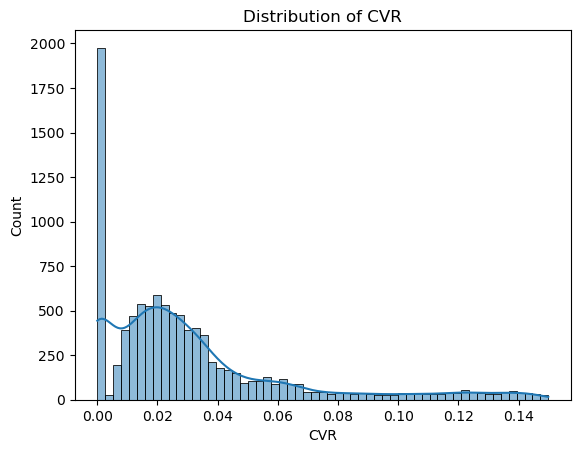

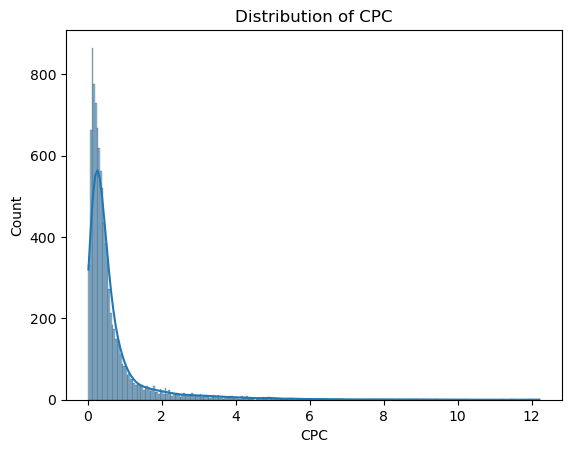

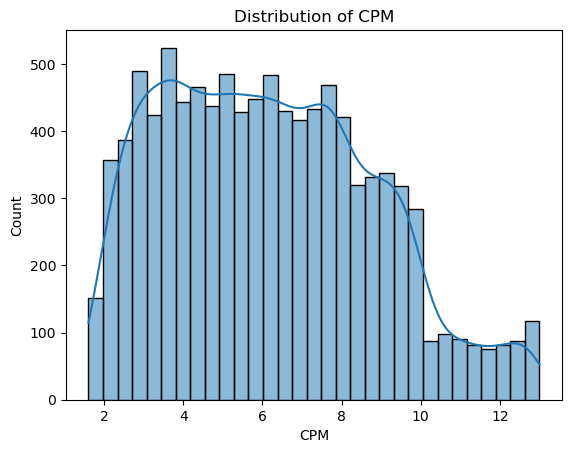

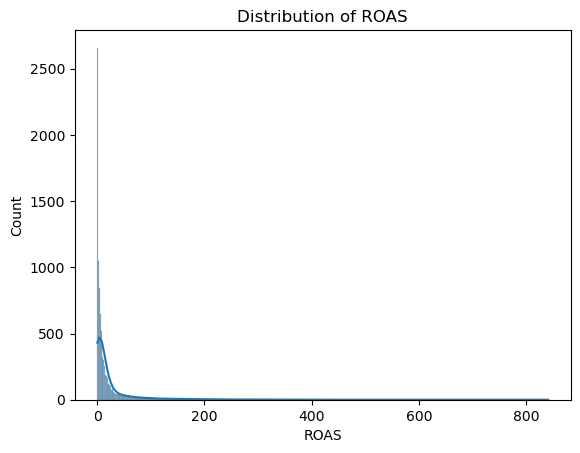

In [92]:
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()